In [9]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [10]:
#caching the data
ff1.Cache.enable_cache(r'C:\Users\nupur\OneDrive\Documents\Formula1_python\cache') 
plotting.setup_mpl()

C:\Users\nupur\anaconda3\lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
C:\Users\nupur\anaconda3\lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [11]:
#load sessions
quali = ff1.get_session(2021, 'Abu Dhabi', 'Q')
quali.load()


core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 22: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 18: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for

In [12]:
#load laps
laps = quali.laps
print(laps.head(1))

                    Time Driver DriverNumber                LapTime  \
0 0 days 00:17:13.438000    VER           33                    NaT   
1 0 days 00:18:37.118000    VER           33 0 days 00:01:23.680000   
2 0 days 00:20:56.346000    VER           33 0 days 00:02:19.228000   
3 0 days 00:22:53.118000    VER           33 0 days 00:01:56.772000   
4 0 days 00:24:16.440000    VER           33 0 days 00:01:23.322000   

   LapNumber  Stint             PitOutTime PitInTime            Sector1Time  \
0        1.0    1.0 0 days 00:15:17.880000       NaT                    NaT   
1        2.0    1.0                    NaT       NaT 0 days 00:00:17.041000   
2        3.0    1.0                    NaT       NaT 0 days 00:00:28.711000   
3        4.0    1.0                    NaT       NaT 0 days 00:00:25.483000   
4        5.0    1.0                    NaT       NaT 0 days 00:00:17.078000   

             Sector2Time  ... FreshTyre             Team  \
0 0 days 00:00:42.860000  ...      Tru

In [13]:
#accessing the lap telemetry
for lap in laps.iterlaps():
    telemetry = lap[1].get_telemetry() 
    print(telemetry.head())

                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:00:18.064 0 days 00:15:17.880000               
3 2021-12-11 13:00:18.209 0 days 00:15:18.025000               
4 2021-12-11 13:00:18.267 0 days 00:15:18.083000               
5 2021-12-11 13:00:18.429 0 days 00:15:18.245000               
6 2021-12-11 13:00:18.507 0 days 00:15:18.323000          16   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              17.228889        0 days 00:00:00  3611     32      1         0   
3              17.228889 0 days 00:00:00.145000  3594     32      1         0   
4              17.228889 0 days 00:00:00.203000  3560     32      1         0   
5              17.228889 0 days 00:00:00.365000  3496     32      1         0   
6              17.228889 0 days 00:00:00.443000  3433     32      1         0   

   Brake  DRS         Source  Distance  RelativeDistance   Status     X     Y  \
2  False    8  interpolation -0.000814     -1.6

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:02:13.622 0 days 00:17:13.438000               
3 2021-12-11 13:02:13.787 0 days 00:17:13.603000               
4 2021-12-11 13:02:13.790 0 days 00:17:13.606000               
5 2021-12-11 13:02:14.010 0 days 00:17:13.826000               
6 2021-12-11 13:02:14.027 0 days 00:17:13.843000          22   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             369.092778        0 days 00:00:00  10994    238      5   
3             369.092778 0 days 00:00:00.165000  10940    240      6   
4             369.092778 0 days 00:00:00.168000  10998    241      6   
5             369.092778 0 days 00:00:00.388000  11056    242      6   
6             369.092778 0 days 00:00:00.405000  11115    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.138945          0.000027  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:37.302 0 days 00:18:37.118000               
3 2021-12-11 13:03:37.347 0 days 00:18:37.163000               
4 2021-12-11 13:03:37.369 0 days 00:18:37.185000               
5 2021-12-11 13:03:37.587 0 days 00:18:37.403000          22   
6 2021-12-11 13:03:37.589 0 days 00:18:37.405000          22   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             299.787778        0 days 00:00:00  12009    228      5   
3             299.787778 0 days 00:00:00.045000  12138    230      5   
4             299.787778 0 days 00:00:00.067000  12124    233      5   
5             299.787778 0 days 00:00:00.285000  12110    237      5   
6             297.387778 0 days 00:00:00.287000  11709    238      5   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.286161          0.000055  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:05:56.530 0 days 00:20:56.346000               
3 2021-12-11 13:05:56.588 0 days 00:20:56.404000               
4 2021-12-11 13:05:56.649 0 days 00:20:56.465000               
5 2021-12-11 13:05:56.828 0 days 00:20:56.644000           9   
6 2021-12-11 13:05:56.869 0 days 00:20:56.685000           9   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             264.134167        0 days 00:00:00  10515    174      4   
3             264.134167 0 days 00:00:00.058000  10515    175      4   
4             264.134167 0 days 00:00:00.119000  10710    176      4   
5             264.134167 0 days 00:00:00.298000  10906    178      4   
6             258.167500 0 days 00:00:00.339000  10977    179      4   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        53  False    8  interpolation   0.131981          0.000025  OnTrack   
3        53  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:28:16.480 0 days 00:43:16.296000               
3 2021-12-11 13:28:16.512 0 days 00:43:16.328000               
4 2021-12-11 13:28:16.589 0 days 00:43:16.405000               
5 2021-12-11 13:28:16.752 0 days 00:43:16.568000          18   
6 2021-12-11 13:28:16.809 0 days 00:43:16.625000          18   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             309.885556        0 days 00:00:00  5952     53      1         9   
3             309.885556 0 days 00:00:00.032000  6090     54      1        10   
4             309.885556 0 days 00:00:00.109000  6244     55      1        10   
5             309.885556 0 days 00:00:00.272000  6398     56      1        11   
6             309.252222 0 days 00:00:00.329000  6478     58      1        12   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.225291          0.000046  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:54.495 0 days 00:48:54.311000               
3 2021-12-11 13:33:54.552 0 days 00:48:54.368000               
4 2021-12-11 13:33:54.609 0 days 00:48:54.425000               
5 2021-12-11 13:33:54.792 0 days 00:48:54.608000          22   
6 2021-12-11 13:33:54.810 0 days 00:48:54.626000          22   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             357.436944        0 days 00:00:00  11119    234      5   
3             357.436944 0 days 00:00:00.057000  10846    236      6   
4             357.436944 0 days 00:00:00.114000  10980    240      6   
5             357.436944 0 days 00:00:00.297000  11115    244      6   
6             355.570278 0 days 00:00:00.315000  11216    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.303327          0.000058  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:43:50.806 0 days 00:58:50.622000               
3 2021-12-11 13:43:50.954 0 days 00:58:50.770000               
4 2021-12-11 13:43:51.009 0 days 00:58:50.825000               
5 2021-12-11 13:43:51.229 0 days 00:58:51.045000               
6 2021-12-11 13:43:51.234 0 days 00:58:51.050000           4   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             363.534722        0 days 00:00:00  11971    234      5   
3             363.534722 0 days 00:00:00.148000  11937    236      5   
4             363.534722 0 days 00:00:00.203000  11648    238      5   
5             363.534722 0 days 00:00:00.423000  11359    240      5   
6             363.534722 0 days 00:00:00.428000  11071    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.082882          0.000016  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:52:51.006 0 days 01:07:50.822000               
3 2021-12-11 13:52:51.029 0 days 01:07:50.845000               
4 2021-12-11 13:52:51.036 0 days 01:07:50.852000               
5 2021-12-11 13:52:51.249 0 days 01:07:51.065000               
6 2021-12-11 13:52:51.276 0 days 01:07:51.092000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             366.041667        0 days 00:00:00  11049    234      5   
3             366.041667 0 days 00:00:00.023000  11005    235      5   
4             366.041667 0 days 00:00:00.030000  10918    238      6   
5             366.041667 0 days 00:00:00.243000  11070    240      6   
6             366.041667 0 days 00:00:00.270000  11222    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.390976          0.000075  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:54:13.115 0 days 01:09:12.931000               
3 2021-12-11 13:54:13.236 0 days 01:09:13.052000               
4 2021-12-11 13:54:13.269 0 days 01:09:13.085000               
5 2021-12-11 13:54:13.476 0 days 01:09:13.292000          31   
6 2021-12-11 13:54:13.489 0 days 01:09:13.305000          31   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             784.767778        0 days 00:00:00  11595    234      5   
3             784.767778 0 days 00:00:00.121000  11426    236      5   
4             784.767778 0 days 00:00:00.154000  11320    238      5   
5             784.767778 0 days 00:00:00.361000  11214    240      6   
6             785.345556 0 days 00:00:00.374000  11255    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.137541          0.000027  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:55:57.902 0 days 01:10:57.718000               
3 2021-12-11 13:55:58.109 0 days 01:10:57.925000               
4 2021-12-11 13:55:58.117 0 days 01:10:57.933000               
5 2021-12-11 13:55:58.329 0 days 01:10:58.145000               
6 2021-12-11 13:55:58.357 0 days 01:10:58.173000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             496.635278        0 days 00:00:00  6978     80      2        42   
3             496.635278 0 days 00:00:00.207000  6985     80      2        42   
4             496.635278 0 days 00:00:00.215000  6999     80      2        43   
5             496.635278 0 days 00:00:00.427000  6971     80      2        43   
6             496.635278 0 days 00:00:00.455000  6943     80      2        44   

   Brake  DRS         Source   Distance  RelativeDistance   Status  \
2  False    8  interpolation   0.000004      8.086599e-10 

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:01:55.303 0 days 01:16:55.119000               
3 2021-12-11 14:01:55.437 0 days 01:16:55.253000               
4 2021-12-11 14:01:55.469 0 days 01:16:55.285000               
5 2021-12-11 14:01:55.677 0 days 01:16:55.493000          11   
6 2021-12-11 14:01:55.689 0 days 01:16:55.505000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             335.484167        0 days 00:00:00  11083    237      5   
3             335.484167 0 days 00:00:00.134000  11045    239      6   
4             335.484167 0 days 00:00:00.166000  11123    241      6   
5             335.484167 0 days 00:00:00.374000  11202    244      6   
6             333.928611 0 days 00:00:00.386000  11290    246      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.110077          0.000021  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:03:18.844 0 days 01:18:18.660000               
3 2021-12-11 14:03:18.998 0 days 01:18:18.814000               
4 2021-12-11 14:03:19.029 0 days 01:18:18.845000               
5 2021-12-11 14:03:19.238 0 days 01:18:19.054000          11   
6 2021-12-11 14:03:19.249 0 days 01:18:19.065000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             338.592778        0 days 00:00:00  10081    164      4   
3             338.592778 0 days 00:00:00.154000  10142    165      4   
4             338.592778 0 days 00:00:00.185000  10242    166      4   
5             338.592778 0 days 00:00:00.394000  10342    167      4   
6             337.992778 0 days 00:00:00.405000  10386    168      4   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        45  False    8  interpolation   0.081492          0.000016  OnTrack   
3        45  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:04.145 0 days 00:18:03.961000               
3 2021-12-11 13:03:04.227 0 days 00:18:04.043000               
4 2021-12-11 13:03:04.249 0 days 00:18:04.065000               
5 2021-12-11 13:03:04.467 0 days 00:18:04.283000          55   
6 2021-12-11 13:03:04.469 0 days 00:18:04.285000          55   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             122.910000        0 days 00:00:00  8696     80      1        36   
3             122.910000 0 days 00:00:00.082000  8696     80      1        36   
4             122.910000 0 days 00:00:00.104000  8696     80      1        36   
5             122.910000 0 days 00:00:00.322000  8696     80      1        36   
6             127.132222 0 days 00:00:00.324000  8696     80      1        36   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation -0.000042     -8.502829e-09  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:04:51.684 0 days 00:19:51.500000               
3 2021-12-11 13:04:51.707 0 days 00:19:51.523000               
4 2021-12-11 13:04:51.710 0 days 00:19:51.526000               
5 2021-12-11 13:04:51.930 0 days 00:19:51.746000               
6 2021-12-11 13:04:51.947 0 days 00:19:51.763000          55   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1073.578056        0 days 00:00:00  11036    232      6   
3            1073.578056 0 days 00:00:00.023000  11115    235      6   
4            1073.578056 0 days 00:00:00.026000  11206    236      6   
5            1073.578056 0 days 00:00:00.246000  11297    238      6   
6            1073.578056 0 days 00:00:00.263000  11388    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.588844          0.000112  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:16:41.634 0 days 00:31:41.450000               
3 2021-12-11 13:16:41.709 0 days 00:31:41.525000               
4 2021-12-11 13:16:41.729 0 days 00:31:41.545000               
5 2021-12-11 13:16:41.949 0 days 00:31:41.765000           7   
6 2021-12-11 13:16:42.150 0 days 00:31:41.966000           7   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             893.784167        0 days 00:00:00  8881     80      1        30   
3             893.784167 0 days 00:00:00.075000  8966     81      1        29   
4             893.784167 0 days 00:00:00.095000  9031     82      1        29   
5             893.784167 0 days 00:00:00.315000  9096     83      1        29   
6             900.017500 0 days 00:00:00.516000  9131     83      1        28   

   Brake  DRS         Source   Distance  RelativeDistance   Status  \
2  False    8  interpolation   0.030455          0.000006 

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:18:38.501 0 days 00:33:38.317000               
3 2021-12-11 13:18:38.550 0 days 00:33:38.366000               
4 2021-12-11 13:18:38.649 0 days 00:33:38.465000               
5 2021-12-11 13:18:38.790 0 days 00:33:38.606000           5   
6 2021-12-11 13:18:38.869 0 days 00:33:38.685000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             508.793333        0 days 00:00:00  11058    232      6   
3             508.793333 0 days 00:00:00.049000  11152    233      6   
4             508.793333 0 days 00:00:00.148000  11305    238      6   
5             508.793333 0 days 00:00:00.289000  11458    243      6   
6             508.126667 0 days 00:00:00.368000  11536    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.045927          0.000009  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:01.346 0 days 00:35:01.162000               
3 2021-12-11 13:20:01.431 0 days 00:35:01.247000               
4 2021-12-11 13:20:01.549 0 days 00:35:01.365000               
5 2021-12-11 13:20:01.671 0 days 00:35:01.487000          16   
6 2021-12-11 13:20:01.769 0 days 00:35:01.585000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             143.104167        0 days 00:00:00  11230    235      6   
3             143.104167 0 days 00:00:00.085000  11251    237      6   
4             143.104167 0 days 00:00:00.203000  11395    239      6   
5             143.104167 0 days 00:00:00.325000  11539    242      6   
6             143.967222 0 days 00:00:00.423000  11655    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.180573          0.000035  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:29:45.991 0 days 00:44:45.807000               
3 2021-12-11 13:29:46.072 0 days 00:44:45.888000               
4 2021-12-11 13:29:46.089 0 days 00:44:45.905000               
5 2021-12-11 13:29:46.309 0 days 00:44:46.125000               
6 2021-12-11 13:29:46.312 0 days 00:44:46.128000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            2713.169167        0 days 00:00:00  11282    237      6   
3            2713.169167 0 days 00:00:00.081000  11350    239      6   
4            2713.169167 0 days 00:00:00.098000  11429    241      6   
5            2713.169167 0 days 00:00:00.318000  11509    243      6   
6            2713.169167 0 days 00:00:00.321000  11589    246      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.164527          0.000031  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:31:09.176 0 days 00:46:08.992000               
3 2021-12-11 13:31:09.229 0 days 00:46:09.045000               
4 2021-12-11 13:31:09.232 0 days 00:46:09.048000               
5 2021-12-11 13:31:09.449 0 days 00:46:09.265000               
6 2021-12-11 13:31:09.472 0 days 00:46:09.288000          31   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             181.991111        0 days 00:00:00  11006    232      6   
3             181.991111 0 days 00:00:00.053000  11044    233      6   
4             181.991111 0 days 00:00:00.056000  11119    235      6   
5             181.991111 0 days 00:00:00.273000  11231    237      6   
6             181.991111 0 days 00:00:00.296000  11344    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.228324          0.000044  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:54:37.321 0 days 01:09:37.137000               
3 2021-12-11 13:54:37.356 0 days 01:09:37.172000               
4 2021-12-11 13:54:37.409 0 days 01:09:37.225000               
5 2021-12-11 13:54:37.596 0 days 01:09:37.412000          22   
6 2021-12-11 13:54:37.628 0 days 01:09:37.444000          22   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             391.911944        0 days 00:00:00  11129    229      5   
3             391.911944 0 days 00:00:00.035000  11076    231      6   
4             391.911944 0 days 00:00:00.088000  11164    236      6   
5             391.911944 0 days 00:00:00.275000  11252    241      6   
6             387.978611 0 days 00:00:00.307000  11432    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.239780          0.000046  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:56:15.073 0 days 01:11:14.889000               
3 2021-12-11 13:56:15.229 0 days 01:11:15.045000               
4 2021-12-11 13:56:15.236 0 days 01:11:15.052000               
5 2021-12-11 13:56:15.449 0 days 01:11:15.265000               
6 2021-12-11 13:56:15.476 0 days 01:11:15.292000          22   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              20.888889        0 days 00:00:00  8714     80      1        40   
3              20.888889 0 days 00:00:00.156000  8715     80      1        40   
4              20.888889 0 days 00:00:00.163000  8717     80      1        41   
5              20.888889 0 days 00:00:00.376000  8695     80      1        41   
6              20.888889 0 days 00:00:00.403000  8674     80      1        41   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000002     -3.9

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:02:39.716 0 days 01:17:39.532000               
3 2021-12-11 14:02:39.718 0 days 01:17:39.534000               
4 2021-12-11 14:02:39.769 0 days 01:17:39.585000               
5 2021-12-11 14:02:39.958 0 days 01:17:39.774000          16   
6 2021-12-11 14:02:39.989 0 days 01:17:39.805000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1955.301389        0 days 00:00:00  11263    234      5   
3            1955.301389 0 days 00:00:00.002000  11162    236      6   
4            1955.301389 0 days 00:00:00.053000  11257    238      6   
5            1955.301389 0 days 00:00:00.242000  11352    241      6   
6            1957.168056 0 days 00:00:00.273000  11357    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.527626          0.000101  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:04:32.679 0 days 01:19:32.495000               
3 2021-12-11 14:04:32.718 0 days 01:19:32.534000               
4 2021-12-11 14:04:32.729 0 days 01:19:32.545000               
5 2021-12-11 14:04:32.949 0 days 01:19:32.765000               
6 2021-12-11 14:04:32.958 0 days 01:19:32.774000          16   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2                2797.14        0 days 00:00:00  7301     67      1         0   
3                2797.14 0 days 00:00:00.039000  7185     67      1         0   
4                2797.14 0 days 00:00:00.050000  7115     66      1         0   
5                2797.14 0 days 00:00:00.270000  7045     65      1         0   
6                2797.14 0 days 00:00:00.279000  6975     65      1         0   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2   True    8  interpolation -0.160248         

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:30.412 0 days 00:18:30.228000               
3 2021-12-11 13:03:30.569 0 days 00:18:30.385000               
4 2021-12-11 13:03:30.587 0 days 00:18:30.403000               
5 2021-12-11 13:03:30.789 0 days 00:18:30.605000               
6 2021-12-11 13:03:30.827 0 days 00:18:30.643000           6   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              78.351944        0 days 00:00:00  5164     44      1         7   
3              78.351944 0 days 00:00:00.157000  5185     44      1         7   
4              78.351944 0 days 00:00:00.175000  5227     45      1         7   
5              78.351944 0 days 00:00:00.377000  5197     45      1         7   
6              78.351944 0 days 00:00:00.415000  5167     46      1         7   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.016917          0.000003  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:07:00.714 0 days 00:22:00.530000               
3 2021-12-11 13:07:00.828 0 days 00:22:00.644000               
4 2021-12-11 13:07:00.909 0 days 00:22:00.725000               
5 2021-12-11 13:07:01.068 0 days 00:22:00.884000          55   
6 2021-12-11 13:07:01.129 0 days 00:22:00.945000          55   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             325.739167        0 days 00:00:00  10612    231      6   
3             325.739167 0 days 00:00:00.114000  10632    233      6   
4             325.739167 0 days 00:00:00.195000  10784    235      6   
5             325.739167 0 days 00:00:00.354000  10936    238      6   
6             323.705833 0 days 00:00:00.415000  11018    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.200279          0.000038  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:09:32.026 0 days 00:24:31.842000               
3 2021-12-11 13:09:32.049 0 days 00:24:31.865000               
4 2021-12-11 13:09:32.068 0 days 00:24:31.884000               
5 2021-12-11 13:09:32.269 0 days 00:24:32.085000               
6 2021-12-11 13:09:32.308 0 days 00:24:32.124000          55   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             189.019167        0 days 00:00:00  10898    235      6   
3             189.019167 0 days 00:00:00.023000  10948    237      6   
4             189.019167 0 days 00:00:00.042000  11047    240      6   
5             189.019167 0 days 00:00:00.243000  11178    242      6   
6             189.019167 0 days 00:00:00.282000  11309    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.477668          0.000091  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:28:26.300 0 days 00:43:26.116000               
3 2021-12-11 13:28:26.391 0 days 00:43:26.207000               
4 2021-12-11 13:28:26.470 0 days 00:43:26.286000               
5 2021-12-11 13:28:26.631 0 days 00:43:26.447000          33   
6 2021-12-11 13:28:26.690 0 days 00:43:26.506000          33   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             206.753056        0 days 00:00:00  4073     28      1         0   
3             206.753056 0 days 00:00:00.091000  4064     28      1         0   
4             206.753056 0 days 00:00:00.170000  4057     28      1         0   
5             206.753056 0 days 00:00:00.331000  4051     28      1         0   
6             210.158889 0 days 00:00:00.390000  4006     28      1         0   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation -0.000056     -1.124905e-08  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:34:06.471 0 days 00:49:06.287000               
3 2021-12-11 13:34:06.553 0 days 00:49:06.369000               
4 2021-12-11 13:34:06.669 0 days 00:49:06.485000               
5 2021-12-11 13:34:06.792 0 days 00:49:06.608000          33   
6 2021-12-11 13:34:06.889 0 days 00:49:06.705000          33   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             663.755833        0 days 00:00:00  10897    239      6   
3             663.755833 0 days 00:00:00.082000  10928    242      6   
4             663.755833 0 days 00:00:00.198000  11099    243      6   
5             663.755833 0 days 00:00:00.321000  11270    245      6   
6             662.255833 0 days 00:00:00.418000  11339    248      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.420759          0.000080  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:35:30.327 0 days 00:50:30.143000               
3 2021-12-11 13:35:30.433 0 days 00:50:30.249000               
4 2021-12-11 13:35:30.449 0 days 00:50:30.265000               
5 2021-12-11 13:35:30.669 0 days 00:50:30.485000               
6 2021-12-11 13:35:30.713 0 days 00:50:30.529000           3   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1485.659722        0 days 00:00:00  10896    232      5   
3            1485.659722 0 days 00:00:00.106000  10691    234      6   
4            1485.659722 0 days 00:00:00.122000  10764    235      6   
5            1485.659722 0 days 00:00:00.342000  10838    236      6   
6            1485.659722 0 days 00:00:00.386000  10912    238      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.191498          0.000037  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:37:16.186 0 days 00:52:16.002000               
3 2021-12-11 13:37:16.193 0 days 00:52:16.009000               
4 2021-12-11 13:37:16.389 0 days 00:52:16.205000               
5 2021-12-11 13:37:16.433 0 days 00:52:16.249000          99   
6 2021-12-11 13:37:16.609 0 days 00:52:16.425000          99   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            5056.070556        0 days 00:00:00  7424     67      1         0   
3            5056.070556 0 days 00:00:00.007000  7214     67      0         0   
4            5056.070556 0 days 00:00:00.203000  6374     67      0         0   
5            5056.070556 0 days 00:00:00.247000  5534     67      0         0   
6            5057.070556 0 days 00:00:00.423000  4940     66      0         0   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.064885         

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:45:35.973 0 days 01:00:35.789000               
3 2021-12-11 13:45:35.995 0 days 01:00:35.811000               
4 2021-12-11 13:45:36.069 0 days 01:00:35.885000               
5 2021-12-11 13:45:36.235 0 days 01:00:36.051000          55   
6 2021-12-11 13:45:36.289 0 days 01:00:36.105000          55   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             104.266667        0 days 00:00:00  9235     80      1        14   
3             104.266667 0 days 00:00:00.022000  9219     80      1        14   
4             104.266667 0 days 00:00:00.096000  9228     80      1        14   
5             104.266667 0 days 00:00:00.262000  9238     80      1        14   
6             104.233333 0 days 00:00:00.316000  9259     80      1        14   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000003     -5.3

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:52:57.883 0 days 01:07:57.699000               
3 2021-12-11 13:52:58.036 0 days 01:07:57.852000               
4 2021-12-11 13:52:58.049 0 days 01:07:57.865000               
5 2021-12-11 13:52:58.269 0 days 01:07:58.085000               
6 2021-12-11 13:52:58.276 0 days 01:07:58.092000          33   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             452.750833        0 days 00:00:00  11089    242      6   
3             452.750833 0 days 00:00:00.153000  11184    244      6   
4             452.750833 0 days 00:00:00.166000  11226    245      6   
5             452.750833 0 days 00:00:00.386000  11269    246      6   
6             452.750833 0 days 00:00:00.393000  11312    248      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.136231          0.000026  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:54:21.275 0 days 01:09:21.091000               
3 2021-12-11 13:54:21.316 0 days 01:09:21.132000               
4 2021-12-11 13:54:21.389 0 days 01:09:21.205000               
5 2021-12-11 13:54:21.556 0 days 01:09:21.372000          33   
6 2021-12-11 13:54:21.609 0 days 01:09:21.425000          33   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             469.737778        0 days 00:00:00  10842    231      5   
3             469.737778 0 days 00:00:00.041000  10634    233      6   
4             469.737778 0 days 00:00:00.114000  10829    236      6   
5             469.737778 0 days 00:00:00.281000  11025    240      6   
6             467.171111 0 days 00:00:00.334000  11089    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.295845          0.000057  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:10.180 0 days 00:18:09.996000               
3 2021-12-11 13:03:10.227 0 days 00:18:10.043000               
4 2021-12-11 13:03:10.389 0 days 00:18:10.205000               
5 2021-12-11 13:03:10.467 0 days 00:18:10.283000               
6 2021-12-11 13:03:10.609 0 days 00:18:10.425000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                    NaN        0 days 00:00:00  11155    228      5   
3                    NaN 0 days 00:00:00.047000  10910    229      6   
4                    NaN 0 days 00:00:00.209000  10929    232      6   
5                    NaN 0 days 00:00:00.287000  10948    236      6   
6                    NaN 0 days 00:00:00.429000  11104    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.124555          0.000024  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:16:54.929 0 days 00:31:54.745000               
3 2021-12-11 13:16:54.949 0 days 00:31:54.765000               
4 2021-12-11 13:16:55.109 0 days 00:31:54.925000               
5 2021-12-11 13:16:55.189 0 days 00:31:55.005000           9   
6 2021-12-11 13:16:55.310 0 days 00:31:55.126000           9   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              51.101389        0 days 00:00:00  8911     80      1         9   
3              51.101389 0 days 00:00:00.020000  8896     80      1         9   
4              51.101389 0 days 00:00:00.180000  8961     80      1         9   
5              51.101389 0 days 00:00:00.260000  9027     80      1         9   
6              50.168056 0 days 00:00:00.381000  9044     80      1        13   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation -0.000255     -5.162636e-08  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:36.211 0 days 00:35:36.027000               
3 2021-12-11 13:20:36.230 0 days 00:35:36.046000               
4 2021-12-11 13:20:36.429 0 days 00:35:36.245000               
5 2021-12-11 13:20:36.470 0 days 00:35:36.286000          10   
6 2021-12-11 13:20:36.649 0 days 00:35:36.465000          10   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             385.301944        0 days 00:00:00  10757    229      5   
3             385.301944 0 days 00:00:00.019000  10566    230      6   
4             385.301944 0 days 00:00:00.218000  10762    233      6   
5             385.301944 0 days 00:00:00.259000  10959    237      6   
6             381.568611 0 days 00:00:00.438000  11091    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.106096          0.000020  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:22:21.302 0 days 00:37:21.118000               
3 2021-12-11 13:22:21.351 0 days 00:37:21.167000               
4 2021-12-11 13:22:21.489 0 days 00:37:21.305000               
5 2021-12-11 13:22:21.591 0 days 00:37:21.407000          10   
6 2021-12-11 13:22:21.709 0 days 00:37:21.525000          10   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2                   67.2        0 days 00:00:00  7097     80      2       100   
3                   67.2 0 days 00:00:00.049000  7107     80      2       100   
4                   67.2 0 days 00:00:00.187000  7129     80      2       100   
5                   67.2 0 days 00:00:00.289000  7152     80      2       100   
6                   67.2 0 days 00:00:00.407000  7152     80      2       100   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.000001      2.6

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:29:55.814 0 days 00:44:55.630000               
3 2021-12-11 13:29:55.872 0 days 00:44:55.688000               
4 2021-12-11 13:29:55.969 0 days 00:44:55.785000               
5 2021-12-11 13:29:56.112 0 days 00:44:55.928000           5   
6 2021-12-11 13:29:56.189 0 days 00:44:56.005000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            4149.412222        0 days 00:00:00  11039    234      5   
3            4149.412222 0 days 00:00:00.058000  10944    236      6   
4            4149.412222 0 days 00:00:00.155000  11034    238      6   
5            4149.412222 0 days 00:00:00.298000  11124    240      6   
6            4149.295556 0 days 00:00:00.375000  11252    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.231210          0.000044  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:31:19.565 0 days 00:46:19.381000               
3 2021-12-11 13:31:19.749 0 days 00:46:19.565000               
4 2021-12-11 13:31:19.752 0 days 00:46:19.568000               
5 2021-12-11 13:31:19.969 0 days 00:46:19.785000               
6 2021-12-11 13:31:19.992 0 days 00:46:19.808000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             652.911389        0 days 00:00:00  11138    230      5   
3             652.911389 0 days 00:00:00.184000  11003    232      5   
4             652.911389 0 days 00:00:00.187000  10732    235      6   
5             652.911389 0 days 00:00:00.404000  10955    238      6   
6             652.911389 0 days 00:00:00.427000  11178    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.073156          0.000014  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:33.499 0 days 00:48:33.315000               
3 2021-12-11 13:33:33.549 0 days 00:48:33.365000               
4 2021-12-11 13:33:33.552 0 days 00:48:33.368000               
5 2021-12-11 13:33:33.769 0 days 00:48:33.585000               
6 2021-12-11 13:33:33.792 0 days 00:48:33.608000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1394.731389        0 days 00:00:00  10929    234      5   
3            1394.731389 0 days 00:00:00.050000  10927    235      5   
4            1394.731389 0 days 00:00:00.053000  10923    237      6   
5            1394.731389 0 days 00:00:00.270000  11055    240      6   
6            1394.731389 0 days 00:00:00.293000  11187    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.218052          0.000042  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:36:34.599 0 days 00:51:34.415000               
3 2021-12-11 13:36:34.633 0 days 00:51:34.449000               
4 2021-12-11 13:36:34.709 0 days 00:51:34.525000               
5 2021-12-11 13:36:34.873 0 days 00:51:34.689000          16   
6 2021-12-11 13:36:34.929 0 days 00:51:34.745000          16   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             177.146944        0 days 00:00:00  8902     80      1       100   
3             177.146944 0 days 00:00:00.034000  8898     80      1       100   
4             177.146944 0 days 00:00:00.110000  8902     80      1       100   
5             177.146944 0 days 00:00:00.274000  8907     80      1       100   
6             176.046944 0 days 00:00:00.330000  8902     79      1        87   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.001021     -1.9

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:43:12.369 0 days 00:58:12.185000               
3 2021-12-11 13:43:12.394 0 days 00:58:12.210000               
4 2021-12-11 13:43:12.409 0 days 00:58:12.225000               
5 2021-12-11 13:43:12.629 0 days 00:58:12.445000               
6 2021-12-11 13:43:12.634 0 days 00:58:12.450000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2               487.2875        0 days 00:00:00  11039    232      5   
3               487.2875 0 days 00:00:00.025000  10750    234      6   
4               487.2875 0 days 00:00:00.040000  10861    236      6   
5               487.2875 0 days 00:00:00.260000  10972    238      6   
6               487.2875 0 days 00:00:00.265000  11083    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.457851          0.000088  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:45:04.093 0 days 01:00:03.909000               
3 2021-12-11 13:45:04.269 0 days 01:00:04.085000               
4 2021-12-11 13:45:04.274 0 days 01:00:04.090000               
5 2021-12-11 13:45:04.489 0 days 01:00:04.305000               
6 2021-12-11 13:45:04.554 0 days 01:00:04.370000               

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2               3.016667        0 days 00:00:00  7085     79      2       100   
3               3.016667 0 days 00:00:00.176000  7086     79      2       100   
4               3.016667 0 days 00:00:00.181000  7088     79      2       100   
5               3.016667 0 days 00:00:00.396000  7075     79      2        91   
6               3.016667 0 days 00:00:00.461000  7062     80      2        83   

   Brake  DRS         Source   Distance  RelativeDistance   Status  \
2  False    8  interpolation  -0.023175         -0.000004 

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:55:48.952 0 days 01:10:48.768000               
3 2021-12-11 13:55:48.996 0 days 01:10:48.812000               
4 2021-12-11 13:55:49.129 0 days 01:10:48.945000               
5 2021-12-11 13:55:49.236 0 days 01:10:49.052000               
6 2021-12-11 13:55:49.349 0 days 01:10:49.165000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                    NaN        0 days 00:00:00  11086    233      5   
3                    NaN 0 days 00:00:00.044000  10810    235      5   
4                    NaN 0 days 00:00:00.177000  10870    237      5   
5                    NaN 0 days 00:00:00.284000  10931    240      6   
6                    NaN 0 days 00:00:00.397000  11065    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.354887          0.000068  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:01:50.716 0 days 01:16:50.532000               
3 2021-12-11 14:01:50.869 0 days 01:16:50.685000               
4 2021-12-11 14:01:50.877 0 days 01:16:50.693000               
5 2021-12-11 14:01:51.089 0 days 01:16:50.905000               
6 2021-12-11 14:01:51.117 0 days 01:16:50.933000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                    NaN        0 days 00:00:00  11052    236      5   
3                    NaN 0 days 00:00:00.153000  11071    237      5   
4                    NaN 0 days 00:00:00.161000  11109    239      6   
5                    NaN 0 days 00:00:00.373000  11197    242      6   
6                    NaN 0 days 00:00:00.401000  11286    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.063969          0.000012  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:03:13.663 0 days 01:18:13.479000               
3 2021-12-11 14:03:13.678 0 days 01:18:13.494000               
4 2021-12-11 14:03:13.769 0 days 01:18:13.585000               
5 2021-12-11 14:03:13.918 0 days 01:18:13.734000               
6 2021-12-11 14:03:13.989 0 days 01:18:13.805000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                  1.085        0 days 00:00:00  10972    229      5   
3                  1.085 0 days 00:00:00.015000  10675    231      5   
4                  1.085 0 days 00:00:00.106000  10873    235      5   
5                  1.085 0 days 00:00:00.255000  11072    239      6   
6                  1.085 0 days 00:00:00.326000  11079    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.295633          0.000057  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:01:03.881 0 days 00:16:03.697000               
3 2021-12-11 13:01:04.027 0 days 00:16:03.843000               
4 2021-12-11 13:01:04.049 0 days 00:16:03.865000               
5 2021-12-11 13:01:04.267 0 days 00:16:04.083000          99   
6 2021-12-11 13:01:04.269 0 days 00:16:04.085000          99   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             703.384167        0 days 00:00:00  7001     80      2        27   
3             703.384167 0 days 00:00:00.146000  6989     80      2        26   
4             703.384167 0 days 00:00:00.168000  7062     81      2        25   
5             703.384167 0 days 00:00:00.386000  7136     82      2        25   
6             706.784167 0 days 00:00:00.388000  7197     82      2        24   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation -0.017294         -0.000003  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:04:26.950 0 days 00:19:26.766000               
3 2021-12-11 13:04:27.148 0 days 00:19:26.964000               
4 2021-12-11 13:04:27.149 0 days 00:19:26.965000               
5 2021-12-11 13:04:27.369 0 days 00:19:27.185000               
6 2021-12-11 13:04:27.388 0 days 00:19:27.204000           7   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             284.771111        0 days 00:00:00  11075    235      6   
3             284.771111 0 days 00:00:00.198000  11148    237      6   
4             284.771111 0 days 00:00:00.199000  11202    239      6   
5             284.771111 0 days 00:00:00.419000  11256    241      6   
6             284.771111 0 days 00:00:00.438000  11311    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.026777          0.000005  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:06:56.095 0 days 00:21:55.911000               
3 2021-12-11 13:06:56.268 0 days 00:21:56.084000               
4 2021-12-11 13:06:56.309 0 days 00:21:56.125000               
5 2021-12-11 13:06:56.508 0 days 00:21:56.324000           9   
6 2021-12-11 13:06:56.529 0 days 00:21:56.345000           9   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             260.735000        0 days 00:00:00  11032    237      6   
3             260.735000 0 days 00:00:00.173000  11092    239      6   
4             260.735000 0 days 00:00:00.214000  11144    240      6   
5             260.735000 0 days 00:00:00.413000  11196    242      6   
6             255.868333 0 days 00:00:00.434000  11238    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.108459          0.000021  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:15:58.170 0 days 00:30:57.986000               
3 2021-12-11 13:15:58.190 0 days 00:30:58.006000               
4 2021-12-11 13:15:58.289 0 days 00:30:58.105000               
5 2021-12-11 13:15:58.430 0 days 00:30:58.246000          18   
6 2021-12-11 13:15:58.509 0 days 00:30:58.325000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1222.311111        0 days 00:00:00  10871    234      6   
3            1222.311111 0 days 00:00:00.020000  10907    236      6   
4            1222.311111 0 days 00:00:00.119000  11044    238      6   
5            1222.311111 0 days 00:00:00.260000  11181    241      6   
6            1218.411111 0 days 00:00:00.339000  11311    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.562699          0.000107  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:19:53.934 0 days 00:34:53.750000               
3 2021-12-11 13:19:53.991 0 days 00:34:53.807000               
4 2021-12-11 13:19:54.089 0 days 00:34:53.905000               
5 2021-12-11 13:19:54.231 0 days 00:34:54.047000          18   
6 2021-12-11 13:19:54.309 0 days 00:34:54.125000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1300.257778        0 days 00:00:00  10813    234      6   
3            1300.257778 0 days 00:00:00.057000  10944    237      6   
4            1300.257778 0 days 00:00:00.155000  11010    237      6   
5            1300.257778 0 days 00:00:00.297000  11076    238      6   
6            1299.857778 0 days 00:00:00.375000  11256    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.510776          0.000098  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:19.968 0 days 00:48:19.784000               
3 2021-12-11 13:33:20.072 0 days 00:48:19.888000               
4 2021-12-11 13:33:20.169 0 days 00:48:19.985000               
5 2021-12-11 13:33:20.312 0 days 00:48:20.128000          16   
6 2021-12-11 13:33:20.389 0 days 00:48:20.205000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             445.602778        0 days 00:00:00  11046    237      6   
3             445.602778 0 days 00:00:00.104000  11152    239      6   
4             445.602778 0 days 00:00:00.201000  11259    241      6   
5             445.602778 0 days 00:00:00.344000  11366    243      6   
6             444.302778 0 days 00:00:00.421000  11448    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.231360          0.000044  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:34:43.142 0 days 00:49:42.958000               
3 2021-12-11 13:34:43.153 0 days 00:49:42.969000               
4 2021-12-11 13:34:43.289 0 days 00:49:43.105000               
5 2021-12-11 13:34:43.393 0 days 00:49:43.209000          16   
6 2021-12-11 13:34:43.509 0 days 00:49:43.325000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             381.944167        0 days 00:00:00  10858    229      6   
3             381.944167 0 days 00:00:00.011000  10879    231      6   
4             381.944167 0 days 00:00:00.147000  10969    234      6   
5             381.944167 0 days 00:00:00.251000  11060    237      6   
6             377.677500 0 days 00:00:00.367000  11182    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.308622          0.000059  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:36:38.212 0 days 00:51:38.028000               
3 2021-12-11 13:36:38.229 0 days 00:51:38.045000               
4 2021-12-11 13:36:38.233 0 days 00:51:38.049000               
5 2021-12-11 13:36:38.449 0 days 00:51:38.265000               
6 2021-12-11 13:36:38.473 0 days 00:51:38.289000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              76.955556        0 days 00:00:00  6963     80      2        67   
3              76.955556 0 days 00:00:00.017000  6980     80      2        67   
4              76.955556 0 days 00:00:00.021000  7013     80      2        67   
5              76.955556 0 days 00:00:00.237000  6984     80      2        67   
6              76.955556 0 days 00:00:00.261000  6955     80      2        67   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.000001      2.6

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:45:31.281 0 days 01:00:31.097000               
3 2021-12-11 13:45:31.469 0 days 01:00:31.285000               
4 2021-12-11 13:45:31.474 0 days 01:00:31.290000               
5 2021-12-11 13:45:31.689 0 days 01:00:31.505000               
6 2021-12-11 13:45:31.714 0 days 01:00:31.530000          22   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             253.709167        0 days 00:00:00  7000     80      2        37   
3             253.709167 0 days 00:00:00.188000  6980     80      2        37   
4             253.709167 0 days 00:00:00.193000  6939     80      2        37   
5             253.709167 0 days 00:00:00.408000  6969     80      2        37   
6             253.709167 0 days 00:00:00.433000  7000     80      2        37   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.000001      2.6

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:55:16.983 0 days 01:10:16.799000               
3 2021-12-11 13:55:16.996 0 days 01:10:16.812000               
4 2021-12-11 13:55:17.108 0 days 01:10:16.924000               
5 2021-12-11 13:55:17.236 0 days 01:10:17.052000          16   
6 2021-12-11 13:55:17.328 0 days 01:10:17.144000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             332.617778        0 days 00:00:00  10751    229      6   
3             332.617778 0 days 00:00:00.013000  10793    231      6   
4             332.617778 0 days 00:00:00.125000  10947    232      6   
5             332.617778 0 days 00:00:00.253000  11102    234      6   
6             329.617778 0 days 00:00:00.345000  11163    238      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.438332          0.000084  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:57:06.915 0 days 01:12:06.731000               
3 2021-12-11 13:57:06.956 0 days 01:12:06.772000               
4 2021-12-11 13:57:06.989 0 days 01:12:06.805000               
5 2021-12-11 13:57:07.196 0 days 01:12:07.012000          16   
6 2021-12-11 13:57:07.209 0 days 01:12:07.025000          16   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             197.379722        0 days 00:00:00  7015     80      2        81   
3             197.379722 0 days 00:00:00.041000  7023     80      2        82   
4             197.379722 0 days 00:00:00.074000  7058     80      2        82   
5             197.379722 0 days 00:00:00.281000  7094     80      2        83   
6             195.624167 0 days 00:00:00.294000  7097     80      2        83   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.000002      2.9

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:02:03.461 0 days 01:17:03.277000               
3 2021-12-11 14:02:03.589 0 days 01:17:03.405000               
4 2021-12-11 14:02:03.597 0 days 01:17:03.413000               
5 2021-12-11 14:02:03.809 0 days 01:17:03.625000               
6 2021-12-11 14:02:03.837 0 days 01:17:03.653000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             860.640833        0 days 00:00:00  10962    236      6   
3             860.640833 0 days 00:00:00.128000  11013    237      6   
4             860.640833 0 days 00:00:00.136000  11116    240      6   
5             860.640833 0 days 00:00:00.348000  11221    242      6   
6             860.640833 0 days 00:00:00.376000  11326    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.172663          0.000033  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:06:23.847 0 days 00:21:23.663000               
3 2021-12-11 13:06:24.027 0 days 00:21:23.843000               
4 2021-12-11 13:06:24.050 0 days 00:21:23.866000               
5 2021-12-11 13:06:24.267 0 days 00:21:24.083000          99   
6 2021-12-11 13:06:24.270 0 days 00:21:24.086000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             193.308611        0 days 00:00:00  11291    236      6   
3             193.308611 0 days 00:00:00.180000  11209    238      6   
4             193.308611 0 days 00:00:00.203000  11392    241      6   
5             193.308611 0 days 00:00:00.420000  11575    245      6   
6             194.134259 0 days 00:00:00.423000  11662    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.032789          0.000006  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:18:44.052 0 days 00:33:43.868000               
3 2021-12-11 13:18:44.070 0 days 00:33:43.886000               
4 2021-12-11 13:18:44.129 0 days 00:33:43.945000               
5 2021-12-11 13:18:44.310 0 days 00:33:44.126000          44   
6 2021-12-11 13:18:44.349 0 days 00:33:44.165000          44   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             379.996389        0 days 00:00:00  11025    233      5   
3             379.996389 0 days 00:00:00.018000  11079    235      6   
4             379.996389 0 days 00:00:00.077000  11192    238      6   
5             379.996389 0 days 00:00:00.258000  11306    241      6   
6             377.563056 0 days 00:00:00.297000  11403    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.416864          0.000080  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:07.169 0 days 00:35:06.985000               
3 2021-12-11 13:20:07.231 0 days 00:35:07.047000               
4 2021-12-11 13:20:07.249 0 days 00:35:07.065000               
5 2021-12-11 13:20:07.469 0 days 00:35:07.285000               
6 2021-12-11 13:20:07.471 0 days 00:35:07.287000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             235.661389        0 days 00:00:00  11355    230      5   
3             235.661389 0 days 00:00:00.062000  11040    232      5   
4             235.661389 0 days 00:00:00.080000  11133    234      5   
5             235.661389 0 days 00:00:00.300000  11227    236      5   
6             235.661389 0 days 00:00:00.302000  11321    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.200489          0.000039  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:29:52.032 0 days 00:44:51.848000               
3 2021-12-11 13:29:52.071 0 days 00:44:51.887000               
4 2021-12-11 13:29:52.230 0 days 00:44:52.046000               
5 2021-12-11 13:29:52.272 0 days 00:44:52.088000          44   
6 2021-12-11 13:29:52.450 0 days 00:44:52.266000          44   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             406.087778        0 days 00:00:00  11102    235      5   
3             406.087778 0 days 00:00:00.039000  11163    237      6   
4             406.087778 0 days 00:00:00.198000  11287    239      6   
5             406.087778 0 days 00:00:00.240000  11411    242      6   
6             403.987778 0 days 00:00:00.418000  11476    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.363571          0.000069  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:29.220 0 days 00:48:29.036000               
3 2021-12-11 13:33:29.233 0 days 00:48:29.049000               
4 2021-12-11 13:33:29.370 0 days 00:48:29.186000               
5 2021-12-11 13:33:29.473 0 days 00:48:29.289000          44   
6 2021-12-11 13:33:29.590 0 days 00:48:29.406000          44   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              23.063889        0 days 00:00:00  11307    232      5   
3              23.063889 0 days 00:00:00.013000  11134    234      6   
4              23.063889 0 days 00:00:00.150000  11255    235      6   
5              23.063889 0 days 00:00:00.253000  11377    236      6   
6              14.997222 0 days 00:00:00.370000  11468    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.316503          0.000061  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:34:52.559 0 days 00:49:52.375000               
3 2021-12-11 13:34:52.673 0 days 00:49:52.489000               
4 2021-12-11 13:34:52.729 0 days 00:49:52.545000               
5 2021-12-11 13:34:52.913 0 days 00:49:52.729000          55   
6 2021-12-11 13:34:52.949 0 days 00:49:52.765000          55   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             496.676944        0 days 00:00:00  11269    233      5   
3             496.676944 0 days 00:00:00.114000  11112    236      6   
4             496.676944 0 days 00:00:00.170000  11259    238      6   
5             496.676944 0 days 00:00:00.354000  11407    241      6   
6             494.110278 0 days 00:00:00.390000  11511    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.308402          0.000059  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:43:25.619 0 days 00:58:25.435000               
3 2021-12-11 13:43:25.634 0 days 00:58:25.450000               
4 2021-12-11 13:43:25.789 0 days 00:58:25.605000               
5 2021-12-11 13:43:25.874 0 days 00:58:25.690000          16   
6 2021-12-11 13:43:26.009 0 days 00:58:25.825000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             368.005278        0 days 00:00:00  11316    230      5   
3             368.005278 0 days 00:00:00.015000  10966    232      5   
4             368.005278 0 days 00:00:00.170000  11144    235      5   
5             368.005278 0 days 00:00:00.255000  11323    239      6   
6             364.371944 0 days 00:00:00.390000  11411    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.296602          0.000057  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:45:13.806 0 days 01:00:13.622000               
3 2021-12-11 13:45:13.909 0 days 01:00:13.725000               
4 2021-12-11 13:45:13.915 0 days 01:00:13.731000               
5 2021-12-11 13:45:14.129 0 days 01:00:13.945000               
6 2021-12-11 13:45:14.155 0 days 01:00:13.971000          16   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              94.977778        0 days 00:00:00  8685     80      1        61   
3              94.977778 0 days 00:00:00.103000  8682     80      1        61   
4              94.977778 0 days 00:00:00.109000  8675     80      1        61   
5              94.977778 0 days 00:00:00.323000  8685     80      1        61   
6              94.977778 0 days 00:00:00.349000  8696     80      1        61   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000977     -1.8

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:53:22.428 0 days 01:08:22.244000               
3 2021-12-11 13:53:22.596 0 days 01:08:22.412000               
4 2021-12-11 13:53:22.609 0 days 01:08:22.425000               
5 2021-12-11 13:53:22.829 0 days 01:08:22.645000               
6 2021-12-11 13:53:22.836 0 days 01:08:22.652000          22   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1119.123889        0 days 00:00:00  11100    236      5   
3            1119.123889 0 days 00:00:00.168000  11154    238      6   
4            1119.123889 0 days 00:00:00.181000  11262    240      6   
5            1119.123889 0 days 00:00:00.401000  11370    242      6   
6            1119.123889 0 days 00:00:00.408000  11478    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.077237          0.000015  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:56:25.097 0 days 01:11:24.913000               
3 2021-12-11 13:56:25.309 0 days 01:11:25.125000               
4 2021-12-11 13:56:25.317 0 days 01:11:25.133000               
5 2021-12-11 13:56:25.529 0 days 01:11:25.345000               
6 2021-12-11 13:56:25.557 0 days 01:11:25.373000          22   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             222.188056        0 days 00:00:00  8532     79      1        34   
3             222.188056 0 days 00:00:00.212000  8489     79      1        23   
4             222.188056 0 days 00:00:00.220000  8402     79      1         0   
5             222.188056 0 days 00:00:00.432000  8438     78      1         0   
6             222.188056 0 days 00:00:00.460000  8474     77      1         0   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000917     -1.7

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:01:24.032 0 days 01:16:23.848000               
3 2021-12-11 14:01:24.109 0 days 01:16:23.925000               
4 2021-12-11 14:01:24.117 0 days 01:16:23.933000               
5 2021-12-11 14:01:24.329 0 days 01:16:24.145000               
6 2021-12-11 14:01:24.397 0 days 01:16:24.213000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            3642.512222        0 days 00:00:00  11036    234      6   
3            3642.512222 0 days 00:00:00.077000  11118    235      6   
4            3642.512222 0 days 00:00:00.085000  11281    237      6   
5            3642.512222 0 days 00:00:00.297000  11385    240      6   
6            3642.512222 0 days 00:00:00.365000  11490    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.118669          0.000023  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:02:47.068 0 days 01:17:46.884000               
3 2021-12-11 14:02:47.158 0 days 01:17:46.974000               
4 2021-12-11 14:02:47.229 0 days 01:17:47.045000               
5 2021-12-11 14:02:47.398 0 days 01:17:47.214000          16   
6 2021-12-11 14:02:47.449 0 days 01:17:47.265000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            2568.893056        0 days 00:00:00  11431    233      5   
3            2568.893056 0 days 00:00:00.090000  11080    235      6   
4            2568.893056 0 days 00:00:00.161000  11234    238      6   
5            2568.893056 0 days 00:00:00.330000  11388    242      6   
6            2564.793056 0 days 00:00:00.381000  11537    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.148949          0.000029  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:00:16.467 0 days 00:15:16.283000               
3 2021-12-11 13:00:16.587 0 days 00:15:16.403000               
4 2021-12-11 13:00:16.670 0 days 00:15:16.486000               
5 2021-12-11 13:00:16.827 0 days 00:15:16.643000          10   
6 2021-12-11 13:00:16.889 0 days 00:15:16.705000          10   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              14.280556        0 days 00:00:00  4051     35      1         9   
3              14.280556 0 days 00:00:00.120000  4057     35      1         9   
4              14.280556 0 days 00:00:00.203000  4115     35      1         9   
5              14.280556 0 days 00:00:00.360000  4174     36      1         9   
6              14.347222 0 days 00:00:00.422000  4224     36      1         9   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation -0.010070         -0.000002  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:02:19.953 0 days 00:17:19.769000               
3 2021-12-11 13:02:20.027 0 days 00:17:19.843000               
4 2021-12-11 13:02:20.169 0 days 00:17:19.985000               
5 2021-12-11 13:02:20.267 0 days 00:17:20.083000          33   
6 2021-12-11 13:02:20.370 0 days 00:17:20.186000          33   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             418.497500        0 days 00:00:00  10931    233      6   
3             418.497500 0 days 00:00:00.074000  11087    235      6   
4             418.497500 0 days 00:00:00.216000  11135    238      6   
5             418.497500 0 days 00:00:00.314000  11183    242      6   
6             416.086389 0 days 00:00:00.417000  11329    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.318317          0.000061  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:44.698 0 days 00:18:44.514000               
3 2021-12-11 13:03:44.787 0 days 00:18:44.603000               
4 2021-12-11 13:03:44.829 0 days 00:18:44.645000               
5 2021-12-11 13:03:45.027 0 days 00:18:44.843000          33   
6 2021-12-11 13:03:45.049 0 days 00:18:44.865000          33   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             410.789722        0 days 00:00:00  10801    232      6   
3             410.789722 0 days 00:00:00.089000  10884    234      6   
4             410.789722 0 days 00:00:00.131000  11030    236      6   
5             410.789722 0 days 00:00:00.329000  11176    239      6   
6             406.123056 0 days 00:00:00.351000  11265    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.214909          0.000041  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:06:03.010 0 days 00:21:02.826000               
3 2021-12-11 13:06:03.068 0 days 00:21:02.884000               
4 2021-12-11 13:06:03.229 0 days 00:21:03.045000               
5 2021-12-11 13:06:03.308 0 days 00:21:03.124000          47   
6 2021-12-11 13:06:03.449 0 days 00:21:03.265000          47   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              30.774167        0 days 00:00:00  10957    234      6   
3              30.774167 0 days 00:00:00.058000  11076    236      6   
4              30.774167 0 days 00:00:00.219000  11137    238      6   
5              30.774167 0 days 00:00:00.298000  11198    241      6   
6              23.907500 0 days 00:00:00.439000  11345    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.324950          0.000062  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:07:27.345 0 days 00:22:27.161000               
3 2021-12-11 13:07:27.428 0 days 00:22:27.244000               
4 2021-12-11 13:07:27.469 0 days 00:22:27.285000               
5 2021-12-11 13:07:27.668 0 days 00:22:27.484000          11   
6 2021-12-11 13:07:27.689 0 days 00:22:27.505000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              88.783889        0 days 00:00:00  11038    231      6   
3              88.783889 0 days 00:00:00.083000  10893    233      6   
4              88.783889 0 days 00:00:00.124000  11032    235      6   
5              88.783889 0 days 00:00:00.323000  11171    237      6   
6              89.550556 0 days 00:00:00.344000  11280    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.235864          0.000046  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:17:29.329 0 days 00:32:29.145000               
3 2021-12-11 13:17:29.470 0 days 00:32:29.286000               
4 2021-12-11 13:17:29.529 0 days 00:32:29.345000               
5 2021-12-11 13:17:29.710 0 days 00:32:29.526000               
6 2021-12-11 13:17:29.749 0 days 00:32:29.565000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2               4.470833        0 days 00:00:00  10890    235      6   
3               4.470833 0 days 00:00:00.141000  10918    237      6   
4               4.470833 0 days 00:00:00.200000  11083    239      6   
5               4.470833 0 days 00:00:00.381000  11249    241      6   
6               4.470833 0 days 00:00:00.420000  11362    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.134638          0.000026  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:19:59.355 0 days 00:34:59.171000               
3 2021-12-11 13:19:59.510 0 days 00:34:59.326000               
4 2021-12-11 13:19:59.570 0 days 00:34:59.386000               
5 2021-12-11 13:19:59.750 0 days 00:34:59.566000           5   
6 2021-12-11 13:19:59.790 0 days 00:34:59.606000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             311.721389        0 days 00:00:00  10832    232      6   
3             311.721389 0 days 00:00:00.155000  10943    234      6   
4             311.721389 0 days 00:00:00.215000  11114    236      6   
5             311.721389 0 days 00:00:00.395000  11285    239      6   
6             309.221389 0 days 00:00:00.435000  11381    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.084983          0.000016  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:13.087 0 days 00:48:12.903000               
3 2021-12-11 13:33:13.112 0 days 00:48:12.928000               
4 2021-12-11 13:33:13.149 0 days 00:48:12.965000               
5 2021-12-11 13:33:13.352 0 days 00:48:13.168000           5   
6 2021-12-11 13:33:13.369 0 days 00:48:13.185000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            3475.054167        0 days 00:00:00  10999    235      6   
3            3475.054167 0 days 00:00:00.025000  11103    237      6   
4            3475.054167 0 days 00:00:00.062000  11188    240      6   
5            3475.054167 0 days 00:00:00.265000  11274    244      6   
6            3476.654167 0 days 00:00:00.282000  11360    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.331822          0.000063  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:34:36.289 0 days 00:49:36.105000               
3 2021-12-11 13:34:36.393 0 days 00:49:36.209000               
4 2021-12-11 13:34:36.489 0 days 00:49:36.305000               
5 2021-12-11 13:34:36.633 0 days 00:49:36.449000           5   
6 2021-12-11 13:34:36.709 0 days 00:49:36.525000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            2629.586667        0 days 00:00:00  10905    228      6   
3            2629.586667 0 days 00:00:00.104000  10983    228      6   
4            2629.586667 0 days 00:00:00.200000  11064    232      6   
5            2629.586667 0 days 00:00:00.344000  11146    237      6   
6            2623.620000 0 days 00:00:00.420000  11233    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation  -0.075700         -0.000015  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:41:56.325 0 days 00:56:56.141000               
3 2021-12-11 13:41:56.474 0 days 00:56:56.290000               
4 2021-12-11 13:41:56.509 0 days 00:56:56.325000               
5 2021-12-11 13:41:56.714 0 days 00:56:56.530000           5   
6 2021-12-11 13:41:56.729 0 days 00:56:56.545000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              92.534722        0 days 00:00:00  10710    235      6   
3              92.534722 0 days 00:00:00.149000  10710    237      6   
4              92.534722 0 days 00:00:00.184000  11009    239      6   
5              92.534722 0 days 00:00:00.389000  11309    242      6   
6              88.245833 0 days 00:00:00.404000  11364    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.117898          0.000022  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:45:09.532 0 days 01:00:09.348000               
3 2021-12-11 13:45:09.595 0 days 01:00:09.411000               
4 2021-12-11 13:45:09.749 0 days 01:00:09.565000               
5 2021-12-11 13:45:09.835 0 days 01:00:09.651000          11   
6 2021-12-11 13:45:09.969 0 days 01:00:09.785000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              90.924444        0 days 00:00:00  7028     80      2        98   
3              90.924444 0 days 00:00:00.063000  6992     80      2        98   
4              90.924444 0 days 00:00:00.217000  6960     80      2        98   
5              90.924444 0 days 00:00:00.303000  6928     80      2        98   
6              89.198333 0 days 00:00:00.437000  6960     80      2        97   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000001     -2.5

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:53:48.140 0 days 01:08:47.956000               
3 2021-12-11 13:53:48.236 0 days 01:08:48.052000               
4 2021-12-11 13:53:48.269 0 days 01:08:48.085000               
5 2021-12-11 13:53:48.476 0 days 01:08:48.292000          11   
6 2021-12-11 13:53:48.489 0 days 01:08:48.305000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            3688.149444        0 days 00:00:00  10674    231      6   
3            3688.149444 0 days 00:00:00.096000  10861    233      6   
4            3688.149444 0 days 00:00:00.129000  10980    236      6   
5            3688.149444 0 days 00:00:00.336000  11100    239      6   
6            3685.505000 0 days 00:00:00.349000  11193    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.150584          0.000029  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:02:10.227 0 days 01:17:10.043000               
3 2021-12-11 14:02:10.357 0 days 01:17:10.173000               
4 2021-12-11 14:02:10.389 0 days 01:17:10.205000               
5 2021-12-11 14:02:10.597 0 days 01:17:10.413000          11   
6 2021-12-11 14:02:10.609 0 days 01:17:10.425000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1369.757222        0 days 00:00:00  11078    239      6   
3            1369.757222 0 days 00:00:00.130000  11189    241      6   
4            1369.757222 0 days 00:00:00.162000  11304    243      6   
5            1369.757222 0 days 00:00:00.370000  11419    245      6   
6            1367.135000 0 days 00:00:00.382000  11467    246      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.149963          0.000029  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:03:33.349 0 days 01:18:33.165000               
3 2021-12-11 14:03:33.358 0 days 01:18:33.174000               
4 2021-12-11 14:03:33.509 0 days 01:18:33.325000               
5 2021-12-11 14:03:33.638 0 days 01:18:33.454000          11   
6 2021-12-11 14:03:33.729 0 days 01:18:33.545000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1035.886111        0 days 00:00:00  11054    229      5   
3            1035.886111 0 days 00:00:00.009000  10879    231      6   
4            1035.886111 0 days 00:00:00.160000  11017    234      6   
5            1035.886111 0 days 00:00:00.289000  11156    237      6   
6            1034.886111 0 days 00:00:00.380000  11285    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.442907          0.000085  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:32.245 0 days 00:18:32.061000               
3 2021-12-11 13:03:32.307 0 days 00:18:32.123000               
4 2021-12-11 13:03:32.329 0 days 00:18:32.145000               
5 2021-12-11 13:03:32.547 0 days 00:18:32.363000          47   
6 2021-12-11 13:03:32.549 0 days 00:18:32.365000          47   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             216.476667        0 days 00:00:00  11718    226      5   
3             216.476667 0 days 00:00:00.062000  11696    228      5   
4             216.476667 0 days 00:00:00.084000  11311    232      5   
5             216.476667 0 days 00:00:00.302000  10926    236      6   
6             217.165556 0 days 00:00:00.304000  10943    237      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.242505          0.000046  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:05:46.200 0 days 00:20:46.016000               
3 2021-12-11 13:05:46.228 0 days 00:20:46.044000               
4 2021-12-11 13:05:46.329 0 days 00:20:46.145000               
5 2021-12-11 13:05:46.468 0 days 00:20:46.284000           9   
6 2021-12-11 13:05:46.549 0 days 00:20:46.365000           9   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              78.200278        0 days 00:00:00  10541    143      3   
3              78.200278 0 days 00:00:00.028000  10589    144      3   
4              78.200278 0 days 00:00:00.129000  10624    145      3   
5              78.200278 0 days 00:00:00.268000  10660    146      3   
6              75.900278 0 days 00:00:00.349000  10783    147      3   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        51  False    8  interpolation   0.229479          0.000044  OnTrack   
3        52  False    

                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:22:03.444 0 days 00:37:03.260000               
3 2021-12-11 13:22:03.509 0 days 00:37:03.325000               
4 2021-12-11 13:22:03.550 0 days 00:37:03.366000               
5 2021-12-11 13:22:03.729 0 days 00:37:03.545000               
6 2021-12-11 13:22:03.790 0 days 00:37:03.606000          99   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             217.946389        0 days 00:00:00  8742     77      1        24   
3             217.946389 0 days 00:00:00.065000  8766     77      1        25   
4             217.946389 0 days 00:00:00.106000  8814     77      1        26   
5             217.946389 0 days 00:00:00.285000  8867     78      1        26   
6             217.946389 0 days 00:00:00.346000  8921     80      1        27   

   Brake  DRS         Source  Distance  RelativeDistance   Status    X     Y  \
2  False    8  interpolation -0.028795         -

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:49.412 0 days 00:48:49.228000               
3 2021-12-11 13:33:49.473 0 days 00:48:49.289000               
4 2021-12-11 13:33:49.549 0 days 00:48:49.365000               
5 2021-12-11 13:33:49.713 0 days 00:48:49.529000          10   
6 2021-12-11 13:33:49.769 0 days 00:48:49.585000          10   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             268.767778        0 days 00:00:00  10978    232      5   
3             268.767778 0 days 00:00:00.061000  10907    234      6   
4             268.767778 0 days 00:00:00.137000  11019    237      6   
5             268.767778 0 days 00:00:00.301000  11131    241      6   
6             269.934444 0 days 00:00:00.357000  11161    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.198186          0.000036  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:39:21.264 0 days 00:54:21.080000               
3 2021-12-11 13:39:21.314 0 days 00:54:21.130000               
4 2021-12-11 13:39:21.429 0 days 00:54:21.245000               
5 2021-12-11 13:39:21.554 0 days 00:54:21.370000          11   
6 2021-12-11 13:39:21.649 0 days 00:54:21.465000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             109.427778        0 days 00:00:00  5862     51      1         9   
3             109.427778 0 days 00:00:00.050000  5889     52      1         9   
4             109.427778 0 days 00:00:00.165000  5816     53      1         9   
5             109.427778 0 days 00:00:00.290000  5743     54      1         9   
6             108.166389 0 days 00:00:00.385000  6005     54      1         9   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.146103          0.000030  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:42:55.116 0 days 00:57:54.932000               
3 2021-12-11 13:42:55.235 0 days 00:57:55.051000               
4 2021-12-11 13:42:55.289 0 days 00:57:55.105000               
5 2021-12-11 13:42:55.475 0 days 00:57:55.291000           5   
6 2021-12-11 13:42:55.509 0 days 00:57:55.325000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              33.928056        0 days 00:00:00  11509    229      5   
3              33.928056 0 days 00:00:00.119000  11372    232      5   
4              33.928056 0 days 00:00:00.173000  11195    233      5   
5              33.928056 0 days 00:00:00.359000  11019    235      6   
6              34.939167 0 days 00:00:00.393000  11046    238      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.320515          0.000062  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:44:42.132 0 days 00:59:41.948000               
3 2021-12-11 13:44:42.275 0 days 00:59:42.091000               
4 2021-12-11 13:44:42.329 0 days 00:59:42.145000               
5 2021-12-11 13:44:42.515 0 days 00:59:42.331000          99   
6 2021-12-11 13:44:42.549 0 days 00:59:42.365000          99   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            2517.629722        0 days 00:00:00  7155     80      2        46   
3            2517.629722 0 days 00:00:00.143000  7158     80      2        46   
4            2517.629722 0 days 00:00:00.197000  7165     80      2        46   
5            2517.629722 0 days 00:00:00.383000  7172     80      2        47   
6            2519.629722 0 days 00:00:00.417000  7185     80      2        47   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000001     -2.5

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:54:29.436 0 days 01:09:29.252000               
3 2021-12-11 13:54:29.476 0 days 01:09:29.292000               
4 2021-12-11 13:54:29.509 0 days 01:09:29.325000               
5 2021-12-11 13:54:29.716 0 days 01:09:29.532000          11   
6 2021-12-11 13:54:29.729 0 days 01:09:29.545000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             261.820833        0 days 00:00:00  11780    225      5   
3             261.820833 0 days 00:00:00.040000  11759    226      5   
4             261.820833 0 days 00:00:00.073000  11349    231      5   
5             261.820833 0 days 00:00:00.280000  10939    236      6   
6             262.931944 0 days 00:00:00.293000  10973    237      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.061059          0.000012  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:56:14.133 0 days 01:11:13.949000               
3 2021-12-11 13:56:14.276 0 days 01:11:14.092000               
4 2021-12-11 13:56:14.349 0 days 01:11:14.165000               
5 2021-12-11 13:56:14.516 0 days 01:11:14.332000          11   
6 2021-12-11 13:56:14.569 0 days 01:11:14.385000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            1412.051944        0 days 00:00:00  7184     80      2        39   
3            1412.051944 0 days 00:00:00.143000  7194     80      2        39   
4            1412.051944 0 days 00:00:00.216000  7167     80      2        39   
5            1412.051944 0 days 00:00:00.383000  7140     80      2        39   
6            1412.518611 0 days 00:00:00.436000  7164     80      2        39   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000001     -2.6

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:05:13.670 0 days 00:20:13.486000               
3 2021-12-11 13:05:13.868 0 days 00:20:13.684000               
4 2021-12-11 13:05:13.869 0 days 00:20:13.685000               
5 2021-12-11 13:05:14.089 0 days 00:20:13.905000               
6 2021-12-11 13:05:14.108 0 days 00:20:13.924000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              74.974167        0 days 00:00:00  11596    226      5   
3              74.974167 0 days 00:00:00.198000  11596    229      5   
4              74.974167 0 days 00:00:00.199000  11303    232      5   
5              74.974167 0 days 00:00:00.419000  11010    235      5   
6              74.974167 0 days 00:00:00.438000  10717    239      5   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.063648          0.000012  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:06:37.988 0 days 00:21:37.804000               
3 2021-12-11 13:06:38.068 0 days 00:21:37.884000               
4 2021-12-11 13:06:38.090 0 days 00:21:37.906000               
5 2021-12-11 13:06:38.308 0 days 00:21:38.124000          63   
6 2021-12-11 13:06:38.309 0 days 00:21:38.125000          63   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             372.736389        0 days 00:00:00  11755    229      5   
3             372.736389 0 days 00:00:00.080000  11799    231      5   
4             372.736389 0 days 00:00:00.102000  11589    234      5   
5             372.736389 0 days 00:00:00.320000  11379    238      5   
6             369.314167 0 days 00:00:00.321000  11165    239      5   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.168136          0.000032  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:10:08.900 0 days 00:25:08.716000               
3 2021-12-11 13:10:09.109 0 days 00:25:08.925000               
4 2021-12-11 13:10:09.329 0 days 00:25:09.145000               
5 2021-12-11 13:10:09.349 0 days 00:25:09.165000          63   
6 2021-12-11 13:10:09.549 0 days 00:25:09.365000          63   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             340.233056        0 days 00:00:00  11141    235      5   
3             340.233056 0 days 00:00:00.209000  10928    237      5   
4             340.233056 0 days 00:00:00.429000  10801    239      5   
5             340.233056 0 days 00:00:00.449000  10674    241      6   
6             337.166389 0 days 00:00:00.649000  10800    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.044835          0.000008  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:17:28.737 0 days 00:32:28.553000               
3 2021-12-11 13:17:28.789 0 days 00:32:28.605000               
4 2021-12-11 13:17:28.870 0 days 00:32:28.686000               
5 2021-12-11 13:17:28.990 0 days 00:32:28.806000           3   
6 2021-12-11 13:17:29.089 0 days 00:32:28.905000           3   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              59.809167        0 days 00:00:00  6849     80      2        38   
3              59.809167 0 days 00:00:00.052000  6832     80      2        36   
4              59.809167 0 days 00:00:00.133000  6944     80      2        28   
5              59.809167 0 days 00:00:00.253000  7057     80      2        21   
6              59.209167 0 days 00:00:00.352000  7102     82      2        20   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.004568      9.263843e-07  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:21:06.296 0 days 00:36:06.112000               
3 2021-12-11 13:21:06.311 0 days 00:36:06.127000               
4 2021-12-11 13:21:06.469 0 days 00:36:06.285000               
5 2021-12-11 13:21:06.551 0 days 00:36:06.367000          18   
6 2021-12-11 13:21:06.689 0 days 00:36:06.505000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             423.749444        0 days 00:00:00  11778    225      5   
3             423.749444 0 days 00:00:00.015000  11882    226      5   
4             423.749444 0 days 00:00:00.173000  11252    231      5   
5             423.749444 0 days 00:00:00.255000  10622    236      6   
6             421.382778 0 days 00:00:00.393000  10608    238      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.165463          0.000032  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:22:55.722 0 days 00:37:55.538000               
3 2021-12-11 13:22:55.791 0 days 00:37:55.607000               
4 2021-12-11 13:22:55.929 0 days 00:37:55.745000               
5 2021-12-11 13:22:56.031 0 days 00:37:55.847000          16   
6 2021-12-11 13:22:56.149 0 days 00:37:55.965000          16   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            4570.922778        0 days 00:00:00  6849     80      2        58   
3            4570.922778 0 days 00:00:00.069000  6845     80      2        59   
4            4570.922778 0 days 00:00:00.207000  6845     80      2        59   
5            4570.922778 0 days 00:00:00.309000  6845     80      2        59   
6            4572.416528 0 days 00:00:00.427000  6853     80      2        60   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000004     -8.1

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:00.027 0 days 00:47:59.843000               
3 2021-12-11 13:33:00.112 0 days 00:47:59.928000               
4 2021-12-11 13:33:00.209 0 days 00:48:00.025000               
5 2021-12-11 13:33:00.352 0 days 00:48:00.168000          99   
6 2021-12-11 13:33:00.429 0 days 00:48:00.245000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            2518.622222        0 days 00:00:00  11242    236      5   
3            2518.622222 0 days 00:00:00.085000  11054    238      5   
4            2518.622222 0 days 00:00:00.182000  10891    240      5   
5            2518.622222 0 days 00:00:00.325000  10728    242      6   
6            2513.655556 0 days 00:00:00.402000  10802    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.263018          0.000050  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:34:23.610 0 days 00:49:23.426000               
3 2021-12-11 13:34:23.673 0 days 00:49:23.489000               
4 2021-12-11 13:34:23.769 0 days 00:49:23.585000               
5 2021-12-11 13:34:23.913 0 days 00:49:23.729000          99   
6 2021-12-11 13:34:23.989 0 days 00:49:23.805000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             476.231944        0 days 00:00:00  11408    232      5   
3             476.231944 0 days 00:00:00.063000  11331    234      5   
4             476.231944 0 days 00:00:00.159000  10978    237      5   
5             476.231944 0 days 00:00:00.303000  10625    241      6   
6             475.431944 0 days 00:00:00.379000  10713    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.190806          0.000037  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:36:13.703 0 days 00:51:13.519000               
3 2021-12-11 13:36:13.714 0 days 00:51:13.530000               
4 2021-12-11 13:36:13.870 0 days 00:51:13.686000               
5 2021-12-11 13:36:13.954 0 days 00:51:13.770000          99   
6 2021-12-11 13:36:14.090 0 days 00:51:13.906000          99   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            1875.609167        0 days 00:00:00  6836     80      2        70   
3            1875.609167 0 days 00:00:00.011000  6835     80      2        71   
4            1875.609167 0 days 00:00:00.167000  6842     80      2        71   
5            1875.609167 0 days 00:00:00.251000  6849     80      2        72   
6            1881.385000 0 days 00:00:00.387000  6857     80      2        72   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.000004      8.0

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:45:30.248 0 days 01:00:30.064000               
3 2021-12-11 13:45:30.274 0 days 01:00:30.090000               
4 2021-12-11 13:45:30.369 0 days 01:00:30.185000               
5 2021-12-11 13:45:30.514 0 days 01:00:30.330000          22   
6 2021-12-11 13:45:30.589 0 days 01:00:30.405000          22   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             256.086944        0 days 00:00:00  6835     80      2        73   
3             256.086944 0 days 00:00:00.026000  6834     80      2        74   
4             256.086944 0 days 00:00:00.121000  6826     80      2        74   
5             256.086944 0 days 00:00:00.266000  6819     80      2        74   
6             253.553611 0 days 00:00:00.341000  6823     80      2        74   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.000003      4.9

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:54:01.368 0 days 01:09:01.184000               
3 2021-12-11 13:54:01.396 0 days 01:09:01.212000               
4 2021-12-11 13:54:01.429 0 days 01:09:01.245000               
5 2021-12-11 13:54:01.636 0 days 01:09:01.452000          55   
6 2021-12-11 13:54:01.649 0 days 01:09:01.465000          55   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             491.161389        0 days 00:00:00  11199    234      5   
3             491.161389 0 days 00:00:00.028000  11053    236      5   
4             491.161389 0 days 00:00:00.061000  10832    239      5   
5             491.161389 0 days 00:00:00.268000  10612    242      6   
6             490.694722 0 days 00:00:00.281000  10688    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.273080          0.000052  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:55:24.774 0 days 01:10:24.590000               
3 2021-12-11 13:55:24.877 0 days 01:10:24.693000               
4 2021-12-11 13:55:24.989 0 days 01:10:24.805000               
5 2021-12-11 13:55:25.117 0 days 01:10:24.933000          55   
6 2021-12-11 13:55:25.209 0 days 01:10:25.025000          55   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             422.741667        0 days 00:00:00  11896    232      5   
3             422.741667 0 days 00:00:00.103000  11930    234      5   
4             422.741667 0 days 00:00:00.215000  11300    237      5   
5             422.741667 0 days 00:00:00.343000  10670    241      6   
6             419.608333 0 days 00:00:00.435000  10754    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.143382          0.000028  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:01:35.451 0 days 01:16:35.267000               
3 2021-12-11 14:01:35.477 0 days 01:16:35.293000               
4 2021-12-11 14:01:35.509 0 days 01:16:35.325000               
5 2021-12-11 14:01:35.717 0 days 01:16:35.533000          22   
6 2021-12-11 14:01:35.729 0 days 01:16:35.545000          22   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             493.162778        0 days 00:00:00  11813    233      5   
3             493.162778 0 days 00:00:00.026000  11836    234      5   
4             493.162778 0 days 00:00:00.058000  11285    238      5   
5             493.162778 0 days 00:00:00.266000  10735    243      6   
6             492.740556 0 days 00:00:00.278000  10780    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.087155          0.000017  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:07:06.427 0 days 00:22:06.243000               
3 2021-12-11 13:07:06.428 0 days 00:22:06.244000               
4 2021-12-11 13:07:06.629 0 days 00:22:06.445000               
5 2021-12-11 13:07:06.668 0 days 00:22:06.484000           4   
6 2021-12-11 13:07:06.849 0 days 00:22:06.665000           4   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             352.449444        0 days 00:00:00  12186    230      5   
3             352.449444 0 days 00:00:00.001000  12244    232      5   
4             352.449444 0 days 00:00:00.202000  12407    234      5   
5             352.449444 0 days 00:00:00.241000  12571    236      5   
6             291.344722 0 days 00:00:00.422000  12102    237      5   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.464104          0.000089  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:19:27.892 0 days 00:34:27.708000               
3 2021-12-11 13:19:27.911 0 days 00:34:27.727000               
4 2021-12-11 13:19:27.989 0 days 00:34:27.805000               
5 2021-12-11 13:19:28.151 0 days 00:34:27.967000           6   
6 2021-12-11 13:19:28.209 0 days 00:34:28.025000           6   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             423.532778        0 days 00:00:00  10802    234      5   
3             423.532778 0 days 00:00:00.019000  10597    236      6   
4             423.532778 0 days 00:00:00.097000  10862    238      6   
5             423.532778 0 days 00:00:00.259000  11128    240      6   
6             421.507917 0 days 00:00:00.317000  11247    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.298733          0.000057  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:57.950 0 days 00:35:57.766000               
3 2021-12-11 13:20:58.149 0 days 00:35:57.965000               
4 2021-12-11 13:20:58.150 0 days 00:35:57.966000               
5 2021-12-11 13:20:58.369 0 days 00:35:58.185000               
6 2021-12-11 13:20:58.390 0 days 00:35:58.206000           6   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             699.869444        0 days 00:00:00  9276     80      1        26   
3             699.869444 0 days 00:00:00.199000  9281     80      1        26   
4             699.869444 0 days 00:00:00.200000  9292     81      1        26   
5             699.869444 0 days 00:00:00.419000  9277     80      1        26   
6             699.869444 0 days 00:00:00.440000  9263     80      1        26   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.016535         

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:38.823 0 days 00:48:38.639000               
3 2021-12-11 13:33:39.029 0 days 00:48:38.845000               
4 2021-12-11 13:33:39.033 0 days 00:48:38.849000               
5 2021-12-11 13:33:39.249 0 days 00:48:39.065000               
6 2021-12-11 13:33:39.313 0 days 00:48:39.129000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             367.221944        0 days 00:00:00  10969    236      6   
3             367.221944 0 days 00:00:00.206000  11015    237      6   
4             367.221944 0 days 00:00:00.210000  11106    240      6   
5             367.221944 0 days 00:00:00.426000  11241    242      6   
6             367.221944 0 days 00:00:00.490000  11376    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.047751          0.000009  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:35:02.606 0 days 00:50:02.422000               
3 2021-12-11 13:35:02.793 0 days 00:50:02.609000               
4 2021-12-11 13:35:02.809 0 days 00:50:02.625000               
5 2021-12-11 13:35:03.029 0 days 00:50:02.845000               
6 2021-12-11 13:35:03.033 0 days 00:50:02.849000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             340.499444        0 days 00:00:00  11306    234      5   
3             340.499444 0 days 00:00:00.187000  11003    235      5   
4             340.499444 0 days 00:00:00.203000  10981    237      5   
5             340.499444 0 days 00:00:00.423000  10959    239      5   
6             340.499444 0 days 00:00:00.427000  10937    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.020062          0.000004  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:42:43.954 0 days 00:57:43.770000               
3 2021-12-11 13:42:44.109 0 days 00:57:43.925000               
4 2021-12-11 13:42:44.194 0 days 00:57:44.010000          99   
5 2021-12-11 13:42:44.329 0 days 00:57:44.145000          99   
6 2021-12-11 13:42:44.434 0 days 00:57:44.250000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             666.751111        0 days 00:00:00  10685    232      5   
3             666.751111 0 days 00:00:00.155000  10790    234      5   
4             666.751111 0 days 00:00:00.240000  10896    237      6   
5             667.251111 0 days 00:00:00.375000  11009    240      6   
6             667.751111 0 days 00:00:00.480000  11123    243      6   

   Throttle  Brake  DRS Source   Distance  RelativeDistance   Status  \
2        99  False    8    car   0.400000          0.000076  OnTrack   
3        99  False    8    pos  10.559

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:46:00.003 0 days 01:00:59.819000               
3 2021-12-11 13:46:00.035 0 days 01:00:59.851000               
4 2021-12-11 13:46:00.189 0 days 01:01:00.005000               
5 2021-12-11 13:46:00.275 0 days 01:01:00.091000          22   
6 2021-12-11 13:46:00.409 0 days 01:01:00.225000          22   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             289.021389        0 days 00:00:00  9228     80      1        26   
3             289.021389 0 days 00:00:00.032000  9213     80      1        26   
4             289.021389 0 days 00:00:00.186000  9200     80      1        26   
5             289.021389 0 days 00:00:00.272000  9187     80      1        26   
6             286.488056 0 days 00:00:00.406000  9211     80      1        26   

   Brake  DRS         Source      Distance  RelativeDistance   Status  \
2  False    8  interpolation -8.188081e-13     -1.55113

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:53:40.282 0 days 01:08:40.098000               
3 2021-12-11 13:53:40.316 0 days 01:08:40.132000               
4 2021-12-11 13:53:40.369 0 days 01:08:40.185000               
5 2021-12-11 13:53:40.556 0 days 01:08:40.372000          77   
6 2021-12-11 13:53:40.589 0 days 01:08:40.405000          77   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1269.366944        0 days 00:00:00  11006    234      5   
3            1269.366944 0 days 00:00:00.034000  10901    235      6   
4            1269.366944 0 days 00:00:00.087000  10981    238      6   
5            1269.366944 0 days 00:00:00.274000  11062    242      6   
6            1271.033611 0 days 00:00:00.307000  11186    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.198166          0.000038  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:55:03.771 0 days 01:10:03.587000               
3 2021-12-11 13:55:03.796 0 days 01:10:03.612000               
4 2021-12-11 13:55:03.948 0 days 01:10:03.764000               
5 2021-12-11 13:55:04.036 0 days 01:10:03.852000          77   
6 2021-12-11 13:55:04.168 0 days 01:10:03.984000          77   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1085.314722        0 days 00:00:00  11007    231      5   
3            1085.314722 0 days 00:00:00.025000  10657    232      6   
4            1085.314722 0 days 00:00:00.177000  10800    234      6   
5            1085.314722 0 days 00:00:00.265000  10944    237      6   
6            1085.714722 0 days 00:00:00.397000  11032    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.224947          0.000043  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:56:43.421 0 days 01:11:43.237000               
3 2021-12-11 13:56:43.476 0 days 01:11:43.292000               
4 2021-12-11 13:56:43.509 0 days 01:11:43.325000               
5 2021-12-11 13:56:43.716 0 days 01:11:43.532000          11   
6 2021-12-11 13:56:43.729 0 days 01:11:43.545000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            2831.071667        0 days 00:00:00  9152     79      1        20   
3            2831.071667 0 days 00:00:00.055000  9125     79      1        20   
4            2831.071667 0 days 00:00:00.088000  9138     79      1        20   
5            2831.071667 0 days 00:00:00.295000  9152     80      1        21   
6            2833.975000 0 days 00:00:00.308000  9180     80      1        21   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.007673         

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:01:40.180 0 days 01:16:39.996000               
3 2021-12-11 14:01:40.278 0 days 01:16:40.094000               
4 2021-12-11 14:01:40.329 0 days 01:16:40.145000               
5 2021-12-11 14:01:40.518 0 days 01:16:40.334000          31   
6 2021-12-11 14:01:40.549 0 days 01:16:40.365000          31   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             340.628056        0 days 00:00:00  10974    234      5   
3             340.628056 0 days 00:00:00.098000  10891    235      6   
4             340.628056 0 days 00:00:00.149000  11037    238      6   
5             340.628056 0 days 00:00:00.338000  11184    242      6   
6             338.261389 0 days 00:00:00.369000  11256    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.021914          0.000004  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 14:03:03.589 0 days 01:18:03.405000               
3 2021-12-11 14:03:03.637 0 days 01:18:03.453000               
4 2021-12-11 14:03:03.689 0 days 01:18:03.505000               
5 2021-12-11 14:03:03.877 0 days 01:18:03.693000          31   
6 2021-12-11 14:03:03.909 0 days 01:18:03.725000          31   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             325.820556        0 days 00:00:00  11173    230      5   
3             325.820556 0 days 00:00:00.048000  10888    233      5   
4             325.820556 0 days 00:00:00.100000  10976    235      5   
5             325.820556 0 days 00:00:00.288000  11065    238      6   
6             322.820556 0 days 00:00:00.320000  11105    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.506634          0.000098  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:22.062 0 days 00:18:21.878000               
3 2021-12-11 13:03:22.068 0 days 00:18:21.884000               
4 2021-12-11 13:03:22.229 0 days 00:18:22.045000               
5 2021-12-11 13:03:22.308 0 days 00:18:22.124000          31   
6 2021-12-11 13:03:22.449 0 days 00:18:22.265000          31   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              21.932778        0 days 00:00:00  5833     68      2         0   
3              21.932778 0 days 00:00:00.006000  5808     68      2         0   
4              21.932778 0 days 00:00:00.167000  5785     67      2         0   
5              21.932778 0 days 00:00:00.246000  5763     67      2         0   
6              21.899444 0 days 00:00:00.387000  5739     66      2         2   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation -0.194206         -0.000039  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:05:27.291 0 days 00:20:27.107000               
3 2021-12-11 13:05:27.388 0 days 00:20:27.204000               
4 2021-12-11 13:05:27.469 0 days 00:20:27.285000               
5 2021-12-11 13:05:27.628 0 days 00:20:27.444000          11   
6 2021-12-11 13:05:27.689 0 days 00:20:27.505000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             275.886389        0 days 00:00:00  11447    234      5   
3             275.886389 0 days 00:00:00.097000  11340    236      5   
4             275.886389 0 days 00:00:00.178000  10925    237      5   
5             275.886389 0 days 00:00:00.337000  10510    239      6   
6             270.419722 0 days 00:00:00.398000  10655    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.297043          0.000057  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:06:51.194 0 days 00:21:51.010000               
3 2021-12-11 13:06:51.250 0 days 00:21:51.066000               
4 2021-12-11 13:06:51.268 0 days 00:21:51.084000               
5 2021-12-11 13:06:51.469 0 days 00:21:51.285000               
6 2021-12-11 13:06:51.508 0 days 00:21:51.324000           6   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             347.199167        0 days 00:00:00  11857    228      5   
3             347.199167 0 days 00:00:00.056000  11902    229      5   
4             347.199167 0 days 00:00:00.074000  11991    231      5   
5             347.199167 0 days 00:00:00.275000  11711    234      5   
6             347.199167 0 days 00:00:00.314000  11431    238      5   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.174538          0.000034  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:33:05.699 0 days 00:48:05.515000               
3 2021-12-11 13:33:05.909 0 days 00:48:05.725000               
4 2021-12-11 13:33:05.913 0 days 00:48:05.729000               
5 2021-12-11 13:33:06.129 0 days 00:48:05.945000               
6 2021-12-11 13:33:06.153 0 days 00:48:05.969000          31   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             380.499444        0 days 00:00:00  11327    240      6   
3             380.499444 0 days 00:00:00.210000  11133    242      6   
4             380.499444 0 days 00:00:00.214000  10744    245      6   
5             380.499444 0 days 00:00:00.430000  10828    247      6   
6             380.499444 0 days 00:00:00.454000  10912    249      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.045536          0.000009  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:36:24.631 0 days 00:51:24.447000               
3 2021-12-11 13:36:24.833 0 days 00:51:24.649000               
4 2021-12-11 13:36:24.849 0 days 00:51:24.665000               
5 2021-12-11 13:36:25.069 0 days 00:51:24.885000               
6 2021-12-11 13:36:25.073 0 days 00:51:24.889000          99   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2               2587.605        0 days 00:00:00  6814     80      2        32   
3               2587.605 0 days 00:00:00.202000  6805     80      2        32   
4               2587.605 0 days 00:00:00.218000  6817     80      2        32   
5               2587.605 0 days 00:00:00.438000  6829     80      2        32   
6               2587.605 0 days 00:00:00.442000  6841     80      2        32   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.000003      5.3

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:41:21.244 0 days 00:56:21.060000               
3 2021-12-11 13:41:21.394 0 days 00:56:21.210000               
4 2021-12-11 13:41:21.409 0 days 00:56:21.225000               
5 2021-12-11 13:41:21.629 0 days 00:56:21.445000               
6 2021-12-11 13:41:21.634 0 days 00:56:21.450000           3   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            4191.006389        0 days 00:00:00  10981    240      5   
3            4191.006389 0 days 00:00:00.150000  10709    242      6   
4            4191.006389 0 days 00:00:00.165000  10759    243      6   
5            4191.006389 0 days 00:00:00.385000  10809    244      6   
6            4191.006389 0 days 00:00:00.390000  10859    246      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.118804          0.000023  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:42:44.867 0 days 00:57:44.683000               
3 2021-12-11 13:42:44.914 0 days 00:57:44.730000               
4 2021-12-11 13:42:44.989 0 days 00:57:44.805000               
5 2021-12-11 13:42:45.154 0 days 00:57:44.970000           3   
6 2021-12-11 13:42:45.209 0 days 00:57:45.025000           3   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              63.411667        0 days 00:00:00  11946    232      5   
3              63.411667 0 days 00:00:00.047000  12052    234      5   
4              63.411667 0 days 00:00:00.122000  11772    235      5   
5              63.411667 0 days 00:00:00.287000  11492    236      5   
6              63.845000 0 days 00:00:00.342000  11145    240      5   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.426241          0.000082  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:08:21.285 0 days 00:23:21.101000               
3 2021-12-11 13:08:21.428 0 days 00:23:21.244000               
4 2021-12-11 13:08:21.429 0 days 00:23:21.245000               
5 2021-12-11 13:08:21.649 0 days 00:23:21.465000               
6 2021-12-11 13:08:21.708 0 days 00:23:21.524000           7   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2              68.384722        0 days 00:00:00  11029    236      5   
3              68.384722 0 days 00:00:00.143000  10864    237      6   
4              68.384722 0 days 00:00:00.144000  10983    240      6   
5              68.384722 0 days 00:00:00.364000  11102    243      6   
6              68.384722 0 days 00:00:00.423000  11222    246      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.034332          0.000007  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:19:06.385 0 days 00:34:06.201000               
3 2021-12-11 13:19:06.509 0 days 00:34:06.325000               
4 2021-12-11 13:19:06.510 0 days 00:34:06.326000               
5 2021-12-11 13:19:06.710 0 days 00:34:06.526000               
6 2021-12-11 13:19:06.750 0 days 00:34:06.566000           9   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             551.678333        0 days 00:00:00  11296    236      5   
3             551.678333 0 days 00:00:00.124000  11187    237      5   
4             551.678333 0 days 00:00:00.125000  10969    239      6   
5             551.678333 0 days 00:00:00.325000  11081    241      6   
6             551.678333 0 days 00:00:00.365000  11194    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.148009          0.000028  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:29.874 0 days 00:35:29.690000               
3 2021-12-11 13:20:29.990 0 days 00:35:29.806000               
4 2021-12-11 13:20:30.069 0 days 00:35:29.885000               
5 2021-12-11 13:20:30.230 0 days 00:35:30.046000           9   
6 2021-12-11 13:20:30.289 0 days 00:35:30.105000           9   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             388.346667        0 days 00:00:00  11029    234      5   
3             388.346667 0 days 00:00:00.116000  10799    236      6   
4             388.346667 0 days 00:00:00.195000  10969    239      6   
5             388.346667 0 days 00:00:00.356000  11139    243      6   
6             384.613333 0 days 00:00:00.415000  11195    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.209735          0.000040  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:31:28.836 0 days 00:46:28.652000               
3 2021-12-11 13:31:28.872 0 days 00:46:28.688000               
4 2021-12-11 13:31:28.969 0 days 00:46:28.785000               
5 2021-12-11 13:31:29.112 0 days 00:46:28.928000          11   
6 2021-12-11 13:31:29.189 0 days 00:46:29.005000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             487.654722        0 days 00:00:00  10994    228      5   
3             487.654722 0 days 00:00:00.036000  10733    230      6   
4             487.654722 0 days 00:00:00.133000  10808    235      6   
5             487.654722 0 days 00:00:00.276000  10883    240      6   
6             484.854722 0 days 00:00:00.353000  11073    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.294399          0.000056  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:35:29.610 0 days 00:50:29.426000               
3 2021-12-11 13:35:29.713 0 days 00:50:29.529000               
4 2021-12-11 13:35:29.789 0 days 00:50:29.605000               
5 2021-12-11 13:35:29.953 0 days 00:50:29.769000          11   
6 2021-12-11 13:35:30.009 0 days 00:50:29.825000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            1893.835000        0 days 00:00:00  7150     80      2        18   
3            1893.835000 0 days 00:00:00.103000  7158     80      2        18   
4            1893.835000 0 days 00:00:00.179000  7170     80      2        18   
5            1893.835000 0 days 00:00:00.343000  7182     80      2        18   
6            1899.768333 0 days 00:00:00.399000  7193     80      2        18   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000001     -2.7

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:41:45.561 0 days 00:56:45.377000               
3 2021-12-11 13:41:45.714 0 days 00:56:45.530000               
4 2021-12-11 13:41:45.769 0 days 00:56:45.585000               
5 2021-12-11 13:41:45.954 0 days 00:56:45.770000          18   
6 2021-12-11 13:41:45.989 0 days 00:56:45.805000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             367.391944        0 days 00:00:00  11754    228      5   
3             367.391944 0 days 00:00:00.153000  11754    228      5   
4             367.391944 0 days 00:00:00.208000  11417    235      5   
5             367.391944 0 days 00:00:00.393000  11081    242      6   
6             364.491944 0 days 00:00:00.428000  11161    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation  -0.119902         -0.000023  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:43:09.604 0 days 00:58:09.420000               
3 2021-12-11 13:43:09.714 0 days 00:58:09.530000               
4 2021-12-11 13:43:09.769 0 days 00:58:09.585000               
5 2021-12-11 13:43:09.954 0 days 00:58:09.770000          18   
6 2021-12-11 13:43:09.989 0 days 00:58:09.805000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             355.968056        0 days 00:00:00  10899    230      5   
3             355.968056 0 days 00:00:00.110000  10742    232      6   
4             355.968056 0 days 00:00:00.165000  10853    234      6   
5             355.968056 0 days 00:00:00.350000  10964    237      6   
6             353.168056 0 days 00:00:00.385000  11105    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.247179          0.000048  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:09:39.633 0 days 00:24:39.449000               
3 2021-12-11 13:09:39.708 0 days 00:24:39.524000               
4 2021-12-11 13:09:39.729 0 days 00:24:39.545000               
5 2021-12-11 13:09:39.948 0 days 00:24:39.764000          22   
6 2021-12-11 13:09:39.949 0 days 00:24:39.765000          22   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             711.456944        0 days 00:00:00  11001    231      6   
3             711.456944 0 days 00:00:00.075000  11057    232      6   
4             711.456944 0 days 00:00:00.096000  11219    236      6   
5             711.456944 0 days 00:00:00.315000  11381    241      6   
6             708.368056 0 days 00:00:00.316000  11452    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.068270          0.000013  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:15:24.566 0 days 00:30:24.382000               
3 2021-12-11 13:15:24.670 0 days 00:30:24.486000               
4 2021-12-11 13:15:24.729 0 days 00:30:24.545000               
5 2021-12-11 13:15:24.910 0 days 00:30:24.726000           5   
6 2021-12-11 13:15:24.949 0 days 00:30:24.765000           5   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            1130.671111        0 days 00:00:00  8606     78      1        19   
3            1130.671111 0 days 00:00:00.104000  8689     79      1        20   
4            1130.671111 0 days 00:00:00.163000  8763     79      1        20   
5            1130.671111 0 days 00:00:00.344000  8837     80      1        20   
6            1130.704444 0 days 00:00:00.383000  8905     81      1        20   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.068964          0.000014  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:22:42.664 0 days 00:37:42.480000               
3 2021-12-11 13:22:42.711 0 days 00:37:42.527000               
4 2021-12-11 13:22:42.769 0 days 00:37:42.585000               
5 2021-12-11 13:22:42.950 0 days 00:37:42.766000          16   
6 2021-12-11 13:22:42.989 0 days 00:37:42.805000          16   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2            4125.598611        0 days 00:00:00  8750     80      1        26   
3            4125.598611 0 days 00:00:00.047000  8747     80      1        26   
4            4125.598611 0 days 00:00:00.105000  8763     80      1        26   
5            4125.598611 0 days 00:00:00.286000  8780     80      1        26   
6            4129.331944 0 days 00:00:00.325000  8752     80      1        26   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation -0.000001     -2.4

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:31:41.061 0 days 00:46:40.877000               
3 2021-12-11 13:31:41.192 0 days 00:46:41.008000               
4 2021-12-11 13:31:41.249 0 days 00:46:41.065000               
5 2021-12-11 13:31:41.432 0 days 00:46:41.248000               
6 2021-12-11 13:31:41.469 0 days 00:46:41.285000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                    NaN        0 days 00:00:00  11028    233      6   
3                    NaN 0 days 00:00:00.131000  11093    235      6   
4                    NaN 0 days 00:00:00.188000  11152    238      6   
5                    NaN 0 days 00:00:00.371000  11212    241      6   
6                    NaN 0 days 00:00:00.408000  11387    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.097199          0.000019  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:39:31.125 0 days 00:54:30.941000               
3 2021-12-11 13:39:31.154 0 days 00:54:30.970000               
4 2021-12-11 13:39:31.289 0 days 00:54:31.105000               
5 2021-12-11 13:39:31.394 0 days 00:54:31.210000          11   
6 2021-12-11 13:39:31.509 0 days 00:54:31.325000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             238.365833        0 days 00:00:00  11190    204      5   
3             238.365833 0 days 00:00:00.029000  11216    206      5   
4             238.365833 0 days 00:00:00.164000  11362    206      5   
5             238.365833 0 days 00:00:00.269000  11509    206      5   
6             231.132500 0 days 00:00:00.384000  11646    212      5   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.246582          0.000047  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:41:40.116 0 days 00:56:39.932000               
3 2021-12-11 13:41:40.154 0 days 00:56:39.970000               
4 2021-12-11 13:41:40.289 0 days 00:56:40.105000               
5 2021-12-11 13:41:40.434 0 days 00:56:40.250000               
6 2021-12-11 13:41:40.509 0 days 00:56:40.325000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                    NaN        0 days 00:00:00  10943    232      6   
3                    NaN 0 days 00:00:00.038000  11025    234      6   
4                    NaN 0 days 00:00:00.173000  11150    237      6   
5                    NaN 0 days 00:00:00.318000  11276    241      6   
6                    NaN 0 days 00:00:00.393000  11350    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.418011          0.000080  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:43:04.182 0 days 00:58:03.998000               
3 2021-12-11 13:43:04.194 0 days 00:58:04.010000               
4 2021-12-11 13:43:04.289 0 days 00:58:04.105000               
5 2021-12-11 13:43:04.434 0 days 00:58:04.250000           5   
6 2021-12-11 13:43:04.509 0 days 00:58:04.325000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             546.707222        0 days 00:00:00  10821    230      6   
3             546.707222 0 days 00:00:00.012000  10864    231      6   
4             546.707222 0 days 00:00:00.107000  10921    234      6   
5             546.707222 0 days 00:00:00.252000  10979    237      6   
6             545.573889 0 days 00:00:00.327000  11167    238      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.242857          0.000047  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:02:43.475 0 days 00:17:43.291000               
3 2021-12-11 13:02:43.627 0 days 00:17:43.443000               
4 2021-12-11 13:02:43.629 0 days 00:17:43.445000               
5 2021-12-11 13:02:43.849 0 days 00:17:43.665000               
6 2021-12-11 13:02:43.867 0 days 00:17:43.683000           7   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                349.145        0 days 00:00:00  10917    235      6   
3                349.145 0 days 00:00:00.152000  10984    237      6   
4                349.145 0 days 00:00:00.154000  11048    238      6   
5                349.145 0 days 00:00:00.374000  11113    239      6   
6                349.145 0 days 00:00:00.392000  11178    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.105416          0.000020  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:04:08.109 0 days 00:19:07.925000               
3 2021-12-11 13:04:08.188 0 days 00:19:08.004000               
4 2021-12-11 13:04:08.289 0 days 00:19:08.105000               
5 2021-12-11 13:04:08.428 0 days 00:19:08.244000           9   
6 2021-12-11 13:04:08.509 0 days 00:19:08.325000           9   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             486.679722        0 days 00:00:00  10753    227      5   
3             486.679722 0 days 00:00:00.079000  10707    229      6   
4             486.679722 0 days 00:00:00.180000  10849    231      6   
5             486.679722 0 days 00:00:00.319000  10991    234      6   
6             484.979722 0 days 00:00:00.400000  11093    236      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.229695          0.000044  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:06:21.226 0 days 00:21:21.042000               
3 2021-12-11 13:06:21.308 0 days 00:21:21.124000               
4 2021-12-11 13:06:21.429 0 days 00:21:21.245000               
5 2021-12-11 13:06:21.588 0 days 00:21:21.404000          18   
6 2021-12-11 13:06:21.649 0 days 00:21:21.465000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             129.865556        0 days 00:00:00  11087    233      5   
3             129.865556 0 days 00:00:00.082000  10894    235      6   
4             129.865556 0 days 00:00:00.203000  11068    239      6   
5             129.865556 0 days 00:00:00.362000  11243    243      6   
6             129.665556 0 days 00:00:00.423000  11329    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.285242          0.000054  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:14:04.277 0 days 00:29:04.093000               
3 2021-12-11 13:14:04.450 0 days 00:29:04.266000               
4 2021-12-11 13:14:04.469 0 days 00:29:04.285000               
5 2021-12-11 13:14:04.670 0 days 00:29:04.486000               
6 2021-12-11 13:14:04.709 0 days 00:29:04.525000          16   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              5485.0675        0 days 00:00:00  4530     35      1         9   
3              5485.0675 0 days 00:00:00.173000  4600     36      1         9   
4              5485.0675 0 days 00:00:00.192000  4740     38      1         9   
5              5485.0675 0 days 00:00:00.393000  4899     40      1         9   
6              5485.0675 0 days 00:00:00.432000  5058     43      1         9   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.024609          0.000005  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:03.984 0 days 00:35:03.800000               
3 2021-12-11 13:20:04.110 0 days 00:35:03.926000               
4 2021-12-11 13:20:04.189 0 days 00:35:04.005000               
5 2021-12-11 13:20:04.350 0 days 00:35:04.166000          16   
6 2021-12-11 13:20:04.409 0 days 00:35:04.225000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             332.076944        0 days 00:00:00  11014    228      5   
3             332.076944 0 days 00:00:00.126000  10957    228      6   
4             332.076944 0 days 00:00:00.205000  11088    234      6   
5             332.076944 0 days 00:00:00.366000  11220    240      6   
6             329.810278 0 days 00:00:00.425000  11350    244      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation  -0.104000         -0.000020  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:30:38.932 0 days 00:45:38.748000               
3 2021-12-11 13:30:38.949 0 days 00:45:38.765000               
4 2021-12-11 13:30:38.952 0 days 00:45:38.768000               
5 2021-12-11 13:30:39.169 0 days 00:45:38.985000               
6 2021-12-11 13:30:39.192 0 days 00:45:39.008000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             852.146944        0 days 00:00:00  10869    234      6   
3             852.146944 0 days 00:00:00.017000  10896    235      6   
4             852.146944 0 days 00:00:00.020000  10951    237      6   
5             852.146944 0 days 00:00:00.237000  11088    239      6   
6             852.146944 0 days 00:00:00.260000  11225    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.351691          0.000067  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:32:03.183 0 days 00:47:02.999000               
3 2021-12-11 13:32:03.232 0 days 00:47:03.048000               
4 2021-12-11 13:32:03.390 0 days 00:47:03.206000               
5 2021-12-11 13:32:03.472 0 days 00:47:03.288000          18   
6 2021-12-11 13:32:03.610 0 days 00:47:03.426000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1339.381944        0 days 00:00:00  10816    230      5   
3            1339.381944 0 days 00:00:00.049000  10705    232      6   
4            1339.381944 0 days 00:00:00.207000  10850    234      6   
5            1339.381944 0 days 00:00:00.289000  10995    236      6   
6            1335.581944 0 days 00:00:00.427000  11130    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.353432          0.000068  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:34:16.090 0 days 00:49:15.906000               
3 2021-12-11 13:34:16.113 0 days 00:49:15.929000               
4 2021-12-11 13:34:16.309 0 days 00:49:16.125000               
5 2021-12-11 13:34:16.353 0 days 00:49:16.169000           5   
6 2021-12-11 13:34:16.529 0 days 00:49:16.345000           5   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1496.214722        0 days 00:00:00  10887    232      6   
3            1496.214722 0 days 00:00:00.023000  11005    234      6   
4            1496.214722 0 days 00:00:00.219000  11098    236      6   
5            1496.214722 0 days 00:00:00.263000  11192    238      6   
6            1492.314722 0 days 00:00:00.439000  11275    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.412260          0.000079  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:37:21.733 0 days 00:52:21.549000               
3 2021-12-11 13:37:21.753 0 days 00:52:21.569000               
4 2021-12-11 13:37:21.869 0 days 00:52:21.685000               
5 2021-12-11 13:37:21.993 0 days 00:52:21.809000               
6 2021-12-11 13:37:22.089 0 days 00:52:21.905000               

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             114.261111        0 days 00:00:00  7067     81      2        48   
3             114.261111 0 days 00:00:00.020000  7019     81      2        48   
4             114.261111 0 days 00:00:00.136000  7034     80      2        48   
5             114.261111 0 days 00:00:00.260000  7050     80      2        48   
6             114.261111 0 days 00:00:00.356000  7070     80      2        48   

   Brake  DRS         Source  Distance  RelativeDistance   Status           X  \
2  False    8  interpolation  0.003076      5.7

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:00:03.302 0 days 00:15:03.118000               
3 2021-12-11 13:00:03.467 0 days 00:15:03.283000               
4 2021-12-11 13:00:03.510 0 days 00:15:03.326000               
5 2021-12-11 13:00:03.707 0 days 00:15:03.523000               
6 2021-12-11 13:00:03.729 0 days 00:15:03.545000               

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2                  0.045        0 days 00:00:00  4546     31      1        16   
3                  0.045 0 days 00:00:00.165000  4526     33      1        16   
4                  0.045 0 days 00:00:00.208000  4486     35      1        17   
5                  0.045 0 days 00:00:00.405000  4446     38      1        18   
6                  0.045 0 days 00:00:00.427000  4885     41      1        21   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.110593          0.000022  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:01:54.849 0 days 00:16:54.665000               
3 2021-12-11 13:01:54.868 0 days 00:16:54.684000               
4 2021-12-11 13:01:54.930 0 days 00:16:54.746000               
5 2021-12-11 13:01:55.108 0 days 00:16:54.924000          11   
6 2021-12-11 13:01:55.150 0 days 00:16:54.966000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             573.234444        0 days 00:00:00  10962    233      6   
3             573.234444 0 days 00:00:00.019000  11025    234      6   
4             573.234444 0 days 00:00:00.081000  11148    236      6   
5             573.234444 0 days 00:00:00.259000  11272    239      6   
6             573.301111 0 days 00:00:00.301000  11350    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.190630          0.000036  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:19.895 0 days 00:18:19.711000               
3 2021-12-11 13:03:19.907 0 days 00:18:19.723000               
4 2021-12-11 13:03:20.030 0 days 00:18:19.846000               
5 2021-12-11 13:03:20.147 0 days 00:18:19.963000          11   
6 2021-12-11 13:03:20.250 0 days 00:18:20.066000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             503.817778        0 days 00:00:00  11059    230      5   
3             503.817778 0 days 00:00:00.012000  10962    232      6   
4             503.817778 0 days 00:00:00.135000  11101    234      6   
5             503.817778 0 days 00:00:00.252000  11240    236      6   
6             501.333194 0 days 00:00:00.355000  11314    238      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.500734          0.000096  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:07:20.964 0 days 00:22:20.780000               
3 2021-12-11 13:07:20.988 0 days 00:22:20.804000               
4 2021-12-11 13:07:21.109 0 days 00:22:20.925000               
5 2021-12-11 13:07:21.228 0 days 00:22:21.044000               
6 2021-12-11 13:07:21.329 0 days 00:22:21.145000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                    NaN        0 days 00:00:00  10979    232      6   
3                    NaN 0 days 00:00:00.024000  11002    234      6   
4                    NaN 0 days 00:00:00.145000  11129    236      6   
5                    NaN 0 days 00:00:00.264000  11256    239      6   
6                    NaN 0 days 00:00:00.365000  11389    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.405917          0.000078  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:08:45.628 0 days 00:23:45.444000               
3 2021-12-11 13:08:45.748 0 days 00:23:45.564000               
4 2021-12-11 13:08:45.769 0 days 00:23:45.585000               
5 2021-12-11 13:08:45.989 0 days 00:23:45.805000               
6 2021-12-11 13:08:46.028 0 days 00:23:45.844000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2               6.699722        0 days 00:00:00  11072    234      6   
3               6.699722 0 days 00:00:00.120000  11119    236      6   
4               6.699722 0 days 00:00:00.141000  11234    238      6   
5               6.699722 0 days 00:00:00.361000  11350    240      6   
6               6.699722 0 days 00:00:00.400000  11466    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.119474          0.000023  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:16:44.481 0 days 00:31:44.297000               
3 2021-12-11 13:16:44.550 0 days 00:31:44.366000               
4 2021-12-11 13:16:44.569 0 days 00:31:44.385000               
5 2021-12-11 13:16:44.789 0 days 00:31:44.605000               
6 2021-12-11 13:16:44.790 0 days 00:31:44.606000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            2609.035556        0 days 00:00:00  11145    217      5   
3            2609.035556 0 days 00:00:00.069000  11001    219      5   
4            2609.035556 0 days 00:00:00.088000  10831    220      5   
5            2609.035556 0 days 00:00:00.308000  10662    222      5   
6            2609.035556 0 days 00:00:00.309000  10493    224      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.201942          0.000039  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:18:30.543 0 days 00:33:30.359000               
3 2021-12-11 13:18:30.670 0 days 00:33:30.486000               
4 2021-12-11 13:18:30.749 0 days 00:33:30.565000               
5 2021-12-11 13:18:30.910 0 days 00:33:30.726000          16   
6 2021-12-11 13:18:30.969 0 days 00:33:30.785000          16   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            2618.126944        0 days 00:00:00  11156    235      6   
3            2618.126944 0 days 00:00:00.127000  11244    239      6   
4            2618.126944 0 days 00:00:00.206000  11359    241      6   
5            2618.126944 0 days 00:00:00.367000  11475    243      6   
6            2611.626944 0 days 00:00:00.426000  11545    245      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.405931          0.000077  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:19:54.768 0 days 00:34:54.584000               
3 2021-12-11 13:19:54.951 0 days 00:34:54.767000               
4 2021-12-11 13:19:54.969 0 days 00:34:54.785000               
5 2021-12-11 13:19:55.189 0 days 00:34:55.005000               
6 2021-12-11 13:19:55.190 0 days 00:34:55.006000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                 6.8025        0 days 00:00:00  11099    234      6   
3                 6.8025 0 days 00:00:00.183000  11153    236      6   
4                 6.8025 0 days 00:00:00.201000  11252    237      6   
5                 6.8025 0 days 00:00:00.421000  11351    239      6   
6                 6.8025 0 days 00:00:00.422000  11451    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.051423          0.000010  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:30:23.748 0 days 00:45:23.564000               
3 2021-12-11 13:30:23.792 0 days 00:45:23.608000               
4 2021-12-11 13:30:23.829 0 days 00:45:23.645000               
5 2021-12-11 13:30:24.049 0 days 00:45:23.865000               
6 2021-12-11 13:30:24.072 0 days 00:45:23.888000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             433.858333        0 days 00:00:00  11868    219      5   
3             433.858333 0 days 00:00:00.044000  11963    221      5   
4             433.858333 0 days 00:00:00.081000  11574    223      5   
5             433.858333 0 days 00:00:00.301000  11186    225      5   
6             433.858333 0 days 00:00:00.324000  10798    227      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.406146          0.000078  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:32:20.142 0 days 00:47:19.958000               
3 2021-12-11 13:32:20.272 0 days 00:47:20.088000               
4 2021-12-11 13:32:20.289 0 days 00:47:20.105000               
5 2021-12-11 13:32:20.509 0 days 00:47:20.325000               
6 2021-12-11 13:32:20.512 0 days 00:47:20.328000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            2264.618611        0 days 00:00:00  11115    237      6   
3            2264.618611 0 days 00:00:00.130000  11156    240      6   
4            2264.618611 0 days 00:00:00.147000  11256    240      6   
5            2264.618611 0 days 00:00:00.367000  11357    240      6   
6            2264.618611 0 days 00:00:00.370000  11458    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.297298          0.000057  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:39:42.368 0 days 00:54:42.184000               
3 2021-12-11 13:39:42.433 0 days 00:54:42.249000               
4 2021-12-11 13:39:42.489 0 days 00:54:42.305000               
5 2021-12-11 13:39:42.673 0 days 00:54:42.489000               
6 2021-12-11 13:39:42.709 0 days 00:54:42.525000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                    NaN        0 days 00:00:00  11398    220      5   
3                    NaN 0 days 00:00:00.065000  11291    221      5   
4                    NaN 0 days 00:00:00.121000  10915    224      5   
5                    NaN 0 days 00:00:00.305000  10540    227      6   
6                    NaN 0 days 00:00:00.341000  10699    229      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        97  False    8  interpolation   0.152681          0.000033  OnTrack   
3        97  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:41:30.428 0 days 00:56:30.244000               
3 2021-12-11 13:41:30.474 0 days 00:56:30.290000               
4 2021-12-11 13:41:30.629 0 days 00:56:30.445000               
5 2021-12-11 13:41:30.754 0 days 00:56:30.570000               
6 2021-12-11 13:41:30.849 0 days 00:56:30.665000               

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              14.385556        0 days 00:00:00  4011      0      1         0   
3              14.385556 0 days 00:00:00.046000  3978      0      1         0   
4              14.385556 0 days 00:00:00.201000  3998      0      1         0   
5              14.385556 0 days 00:00:00.326000  4018      0      1         0   
6              14.385556 0 days 00:00:00.421000  4038      0      1         0   

   Brake  DRS         Source      Distance  RelativeDistance   Status       X  \
2  False    8  interpolation -1.059862e-23     

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:42:54.743 0 days 00:57:54.559000               
3 2021-12-11 13:42:54.754 0 days 00:57:54.570000               
4 2021-12-11 13:42:54.849 0 days 00:57:54.665000               
5 2021-12-11 13:42:54.995 0 days 00:57:54.811000               
6 2021-12-11 13:42:55.069 0 days 00:57:54.885000               

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                    NaN        0 days 00:00:00  11374    278      7   
3                    NaN 0 days 00:00:00.011000  11406    279      7   
4                    NaN 0 days 00:00:00.106000  11422    279      7   
5                    NaN 0 days 00:00:00.252000  11439    280      7   
6                    NaN 0 days 00:00:00.326000  11444    281      7   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.189712          0.000030  OnTrack   
3        99  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:25.803 0 days 00:18:25.619000               
3 2021-12-11 13:03:25.907 0 days 00:18:25.723000               
4 2021-12-11 13:03:25.969 0 days 00:18:25.785000               
5 2021-12-11 13:03:26.147 0 days 00:18:25.963000          14   
6 2021-12-11 13:03:26.170 0 days 00:18:25.986000          14   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              66.083611        0 days 00:00:00  7562     64      1        16   
3              66.083611 0 days 00:00:00.104000  7619     65      1        16   
4              66.083611 0 days 00:00:00.166000  7809     66      1        15   
5              66.083611 0 days 00:00:00.344000  7999     67      1        15   
6              65.383611 0 days 00:00:00.367000  8123     69      1        15   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.062809          0.000013  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:05:20.593 0 days 00:20:20.409000               
3 2021-12-11 13:05:20.668 0 days 00:20:20.484000               
4 2021-12-11 13:05:20.669 0 days 00:20:20.485000               
5 2021-12-11 13:05:20.889 0 days 00:20:20.705000               
6 2021-12-11 13:05:20.908 0 days 00:20:20.724000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             128.268889        0 days 00:00:00  10871    231      5   
3             128.268889 0 days 00:00:00.075000  10666    233      6   
4             128.268889 0 days 00:00:00.076000  10762    235      6   
5             128.268889 0 days 00:00:00.296000  10858    237      6   
6             128.268889 0 days 00:00:00.315000  10955    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.229217          0.000044  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:08:56.988 0 days 00:23:56.804000               
3 2021-12-11 13:08:56.989 0 days 00:23:56.805000               
4 2021-12-11 13:08:57.169 0 days 00:23:56.985000               
5 2021-12-11 13:08:57.229 0 days 00:23:57.045000          11   
6 2021-12-11 13:08:57.389 0 days 00:23:57.205000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             416.000833        0 days 00:00:00  10637    233      5   
3             416.000833 0 days 00:00:00.001000  10697    235      6   
4             416.000833 0 days 00:00:00.181000  10808    237      6   
5             416.000833 0 days 00:00:00.241000  10920    239      6   
6             412.134167 0 days 00:00:00.401000  11062    242      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.530635          0.000102  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:10:21.998 0 days 00:25:21.814000               
3 2021-12-11 13:10:22.029 0 days 00:25:21.845000               
4 2021-12-11 13:10:22.049 0 days 00:25:21.865000               
5 2021-12-11 13:10:22.269 0 days 00:25:22.085000          31   
6 2021-12-11 13:10:22.489 0 days 00:25:22.305000          31   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             761.666111        0 days 00:00:00  11269    225      5   
3             761.666111 0 days 00:00:00.031000  11134    226      5   
4             761.666111 0 days 00:00:00.051000  10908    231      5   
5             761.666111 0 days 00:00:00.271000  10683    236      6   
6             761.666111 0 days 00:00:00.491000  10781    238      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.075664          0.000014  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:16:57.838 0 days 00:31:57.654000               
3 2021-12-11 13:16:57.870 0 days 00:31:57.686000               
4 2021-12-11 13:16:57.949 0 days 00:31:57.765000               
5 2021-12-11 13:16:58.110 0 days 00:31:57.926000          11   
6 2021-12-11 13:16:58.169 0 days 00:31:57.985000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2              65.221389        0 days 00:00:00  3932     34      1         0   
3              65.221389 0 days 00:00:00.032000  3880     34      1         0   
4              65.221389 0 days 00:00:00.111000  3864     33      1         0   
5              65.221389 0 days 00:00:00.272000  3849     33      1         0   
6              65.999167 0 days 00:00:00.331000  4090     32      1         0   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2   True    8  interpolation -0.113195         -0.000023  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:45.676 0 days 00:35:45.492000               
3 2021-12-11 13:20:45.710 0 days 00:35:45.526000               
4 2021-12-11 13:20:45.850 0 days 00:35:45.666000               
5 2021-12-11 13:20:45.950 0 days 00:35:45.766000          11   
6 2021-12-11 13:20:46.070 0 days 00:35:45.886000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             506.740833        0 days 00:00:00  10774    228      5   
3             506.740833 0 days 00:00:00.034000  10540    229      6   
4             506.740833 0 days 00:00:00.174000  10674    232      6   
5             506.740833 0 days 00:00:00.274000  10809    236      6   
6             504.397778 0 days 00:00:00.394000  10966    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.086475          0.000017  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:14.712 0 days 00:18:14.528000               
3 2021-12-11 13:03:14.769 0 days 00:18:14.585000               
4 2021-12-11 13:03:14.788 0 days 00:18:14.604000               
5 2021-12-11 13:03:14.989 0 days 00:18:14.805000               
6 2021-12-11 13:03:15.028 0 days 00:18:14.844000          77   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             125.041667        0 days 00:00:00  7787     66      1        25   
3             125.041667 0 days 00:00:00.057000  7900     67      1        25   
4             125.041667 0 days 00:00:00.076000  8127     68      1        25   
5             125.041667 0 days 00:00:00.277000  8202     69      1        30   
6             125.041667 0 days 00:00:00.316000  8277     70      1        35   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.125503          0.000025  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:06:30.749 0 days 00:21:30.565000               
3 2021-12-11 13:06:30.827 0 days 00:21:30.643000               
4 2021-12-11 13:06:30.850 0 days 00:21:30.666000               
5 2021-12-11 13:06:31.068 0 days 00:21:30.884000          77   
6 2021-12-11 13:06:31.070 0 days 00:21:30.886000          77   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             408.921111        0 days 00:00:00  11034    231      5   
3             408.921111 0 days 00:00:00.078000  10765    233      6   
4             408.921111 0 days 00:00:00.101000  10889    236      6   
5             408.921111 0 days 00:00:00.319000  11013    240      6   
6             406.721111 0 days 00:00:00.321000  11013    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.252836          0.000048  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:08:38.716 0 days 00:23:38.532000               
3 2021-12-11 13:08:38.748 0 days 00:23:38.564000               
4 2021-12-11 13:08:38.749 0 days 00:23:38.565000               
5 2021-12-11 13:08:38.969 0 days 00:23:38.785000               
6 2021-12-11 13:08:39.028 0 days 00:23:38.844000          55   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                 14.355        0 days 00:00:00  10847    234      5   
3                 14.355 0 days 00:00:00.032000  10780    236      6   
4                 14.355 0 days 00:00:00.033000  10870    237      6   
5                 14.355 0 days 00:00:00.253000  10960    239      6   
6                 14.355 0 days 00:00:00.312000  11051    241      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.388478          0.000074  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:18:12.572 0 days 00:33:12.388000               
3 2021-12-11 13:18:12.630 0 days 00:33:12.446000               
4 2021-12-11 13:18:12.769 0 days 00:33:12.585000               
5 2021-12-11 13:18:12.870 0 days 00:33:12.686000           7   
6 2021-12-11 13:18:12.989 0 days 00:33:12.805000           7   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2             960.233056        0 days 00:00:00  8482     71      1        30   
3             960.233056 0 days 00:00:00.058000  8616     72      1        32   
4             960.233056 0 days 00:00:00.197000  8894     74      1        37   
5             960.233056 0 days 00:00:00.298000  9173     76      1        43   
6             964.733056 0 days 00:00:00.417000  9443     79      1        21   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.181150          0.000037  O

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:10.060 0 days 00:35:09.876000               
3 2021-12-11 13:20:10.109 0 days 00:35:09.925000               
4 2021-12-11 13:20:10.110 0 days 00:35:09.926000               
5 2021-12-11 13:20:10.329 0 days 00:35:10.145000               
6 2021-12-11 13:20:10.350 0 days 00:35:10.166000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                 397.25        0 days 00:00:00  11350    233      5   
3                 397.25 0 days 00:00:00.049000  11131    234      5   
4                 397.25 0 days 00:00:00.050000  10694    236      6   
5                 397.25 0 days 00:00:00.269000  10822    239      6   
6                 397.25 0 days 00:00:00.290000  10950    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.223706          0.000043  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:02:38.533 0 days 00:17:38.349000               
3 2021-12-11 13:02:38.587 0 days 00:17:38.403000               
4 2021-12-11 13:02:38.589 0 days 00:17:38.405000               
5 2021-12-11 13:02:38.809 0 days 00:17:38.625000               
6 2021-12-11 13:02:38.827 0 days 00:17:38.643000           9   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             376.901389        0 days 00:00:00  10941    231      5   
3             376.901389 0 days 00:00:00.054000  10848    232      6   
4             376.901389 0 days 00:00:00.056000  10934    232      6   
5             376.901389 0 days 00:00:00.276000  11021    232      6   
6             376.901389 0 days 00:00:00.294000  11108    232      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.218228          0.000042  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:16:28.576 0 days 00:31:28.392000               
3 2021-12-11 13:16:28.669 0 days 00:31:28.485000               
4 2021-12-11 13:16:28.789 0 days 00:31:28.605000               
5 2021-12-11 13:16:28.909 0 days 00:31:28.725000          99   
6 2021-12-11 13:16:28.990 0 days 00:31:28.806000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2            1265.850278        0 days 00:00:00  10958    235      6   
3            1265.850278 0 days 00:00:00.093000  10982    236      6   
4            1265.850278 0 days 00:00:00.213000  11129    237      6   
5            1265.850278 0 days 00:00:00.333000  11276    239      6   
6            1267.383611 0 days 00:00:00.414000  11376    243      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.147745          0.000028  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:00:08.916 0 days 00:15:08.732000               
3 2021-12-11 13:00:08.986 0 days 00:15:08.802000               
4 2021-12-11 13:00:08.990 0 days 00:15:08.806000               
5 2021-12-11 13:00:09.210 0 days 00:15:09.026000               
6 2021-12-11 13:00:09.226 0 days 00:15:09.042000          11   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2                  17.85        0 days 00:00:00  6379     52      1        11   
3                  17.85 0 days 00:00:00.070000  6469     53      1        12   
4                  17.85 0 days 00:00:00.074000  6666     55      1        13   
5                  17.85 0 days 00:00:00.294000  6863     57      1        14   
6                  17.85 0 days 00:00:00.310000  7061     60      1        16   

   Brake  DRS         Source  Distance  RelativeDistance   Status  \
2  False    8  interpolation  0.087194          0.000018  O

                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:16:47.292 0 days 00:31:47.108000               
3 2021-12-11 13:16:47.429 0 days 00:31:47.245000               
4 2021-12-11 13:16:47.469 0 days 00:31:47.285000               
5 2021-12-11 13:16:47.649 0 days 00:31:47.465000               
6 2021-12-11 13:16:47.709 0 days 00:31:47.525000           5   

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2                207.475        0 days 00:00:00  8264     87      2        39   
3                207.475 0 days 00:00:00.137000  8322     89      2        38   
4                207.475 0 days 00:00:00.177000  8439     93      2        36   
5                207.475 0 days 00:00:00.357000  8757     98      2        36   
6                207.475 0 days 00:00:00.417000  9075    103      2        37   

   Brake  DRS         Source   Distance  RelativeDistance   Status     X  \
2  False    8  interpolation   0.070384          0.0

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:20:14.545 0 days 00:35:14.361000               
3 2021-12-11 13:20:14.631 0 days 00:35:14.447000               
4 2021-12-11 13:20:14.709 0 days 00:35:14.525000               
5 2021-12-11 13:20:14.871 0 days 00:35:14.687000          99   
6 2021-12-11 13:20:14.929 0 days 00:35:14.745000          99   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             610.885000        0 days 00:00:00  10782    231      6   
3             610.885000 0 days 00:00:00.086000  10852    233      6   
4             610.885000 0 days 00:00:00.164000  10987    235      6   
5             610.885000 0 days 00:00:00.326000  11123    237      6   
6             608.918333 0 days 00:00:00.384000  11227    240      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.186709          0.000036  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:03:59.527 0 days 00:18:59.343000               
3 2021-12-11 13:03:59.730 0 days 00:18:59.546000               
4 2021-12-11 13:03:59.747 0 days 00:18:59.563000               
5 2021-12-11 13:03:59.948 0 days 00:18:59.764000          18   
6 2021-12-11 13:03:59.950 0 days 00:18:59.766000          18   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             269.055278        0 days 00:00:00  11255    218      5   
3             269.055278 0 days 00:00:00.203000  11077    219      5   
4             269.055278 0 days 00:00:00.220000  10722    221      5   
5             269.055278 0 days 00:00:00.421000  10737    229      6   
6             268.010833 0 days 00:00:00.423000  10838    230      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2       100  False    8  interpolation   0.004376      8.387564e-07  OnTrack   
3       100  False    

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
2 2021-12-11 13:18:57.549 0 days 00:33:57.365000               
3 2021-12-11 13:18:57.590 0 days 00:33:57.406000               
4 2021-12-11 13:18:57.729 0 days 00:33:57.545000               
5 2021-12-11 13:18:57.830 0 days 00:33:57.646000          22   
6 2021-12-11 13:18:57.949 0 days 00:33:57.765000          22   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2             225.974167        0 days 00:00:00  10678    230      5   
3             225.974167 0 days 00:00:00.041000  10669    232      6   
4             225.974167 0 days 00:00:00.180000  10864    234      6   
5             225.974167 0 days 00:00:00.281000  11060    236      6   
6             227.440833 0 days 00:00:00.400000  11156    239      6   

   Throttle  Brake  DRS         Source   Distance  RelativeDistance   Status  \
2        99  False    8  interpolation   0.314889          0.000060  OnTrack   
3        99  False    

In [14]:
print(telemetry[['X', 'Y', 'Z']].dtypes)

X    int64
Y    int64
Z    int64
dtype: object


In [15]:
telemetry = telemetry.dropna(subset=['X', 'Y', 'Z'])

In [16]:
# Select laps for drivers
laps_ver = laps.pick_drivers('VER')
laps_ham = laps.pick_drivers('HAM')

# Get telemetry for fastest laps
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()

# Add driver column to telemetry data
fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'

# Merge telemetry data for both drivers
telemetry = pd.concat([fastest_ver, fastest_ham], ignore_index=True)

# Verify the merged DataFrame
print(telemetry.head())

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


                     Date            SessionTime DriverAhead  \
0 2021-12-11 13:52:51.006 0 days 01:07:50.822000               
1 2021-12-11 13:52:51.029 0 days 01:07:50.845000               
2 2021-12-11 13:52:51.036 0 days 01:07:50.852000               
3 2021-12-11 13:52:51.249 0 days 01:07:51.065000               
4 2021-12-11 13:52:51.276 0 days 01:07:51.092000          11   

   DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
0             366.041667        0 days 00:00:00  11049    234      5   
1             366.041667 0 days 00:00:00.023000  11005    235      5   
2             366.041667 0 days 00:00:00.030000  10918    238      6   
3             366.041667 0 days 00:00:00.243000  11070    240      6   
4             366.041667 0 days 00:00:00.270000  11222    243      6   

   Throttle  Brake  DRS         Source  RelativeDistance   Status           X  \
0       100  False    8  interpolation          0.000075  OnTrack  530.462471   
1       100  False  

In [17]:
# Creating 25 mini-sectors
num_minisectors = 25

# Maximum value of distance that is known in the telemetry
total_distance = total_distance = max(telemetry['Distance'])

# Equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

In [18]:
# Initiate minisector variable
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [19]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [20]:
# Calculate avg. speed per driver per mini sector
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
print(average_speed)

    Minisector Driver       Speed
0            1    HAM  260.615385
1            1    VER  260.461538
2            2    HAM  233.035714
3            2    VER  236.482759
4            3    HAM  219.600000
5            3    VER  216.766667
6            4    HAM  265.080000
7            4    VER  265.080000
8            5    HAM  279.173913
9            5    VER  279.869565
10           6    HAM  293.652174
11           6    VER  294.869565
12           7    HAM  172.684211
13           7    VER  172.026316
14           8    HAM  199.303030
15           8    VER  198.843750
16           9    HAM  275.826087
17           9    VER  276.458333
18          10    HAM  303.095238
19          10    VER  304.904762
20          11    HAM  314.333333
21          11    VER  317.700000
22          12    HAM  319.428571
23          12    VER  323.761905
24          13    HAM  126.129630
25          13    VER  123.203704
26          14    HAM  204.781250
27          14    VER  202.333333
28          15

In [21]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})
print(fastest_driver)

    Minisector Fastest_driver
0            1            HAM
3            2            VER
4            3            HAM
6            4            HAM
9            5            VER
11           6            VER
12           7            HAM
14           8            HAM
17           9            VER
19          10            VER
21          11            VER
23          12            VER
24          13            HAM
26          14            HAM
29          15            VER
31          16            VER
33          17            VER
34          18            HAM
37          19            VER
39          20            VER
40          21            HAM
43          22            VER
45          23            VER
46          24            HAM
49          25            VER


In [22]:
# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 2

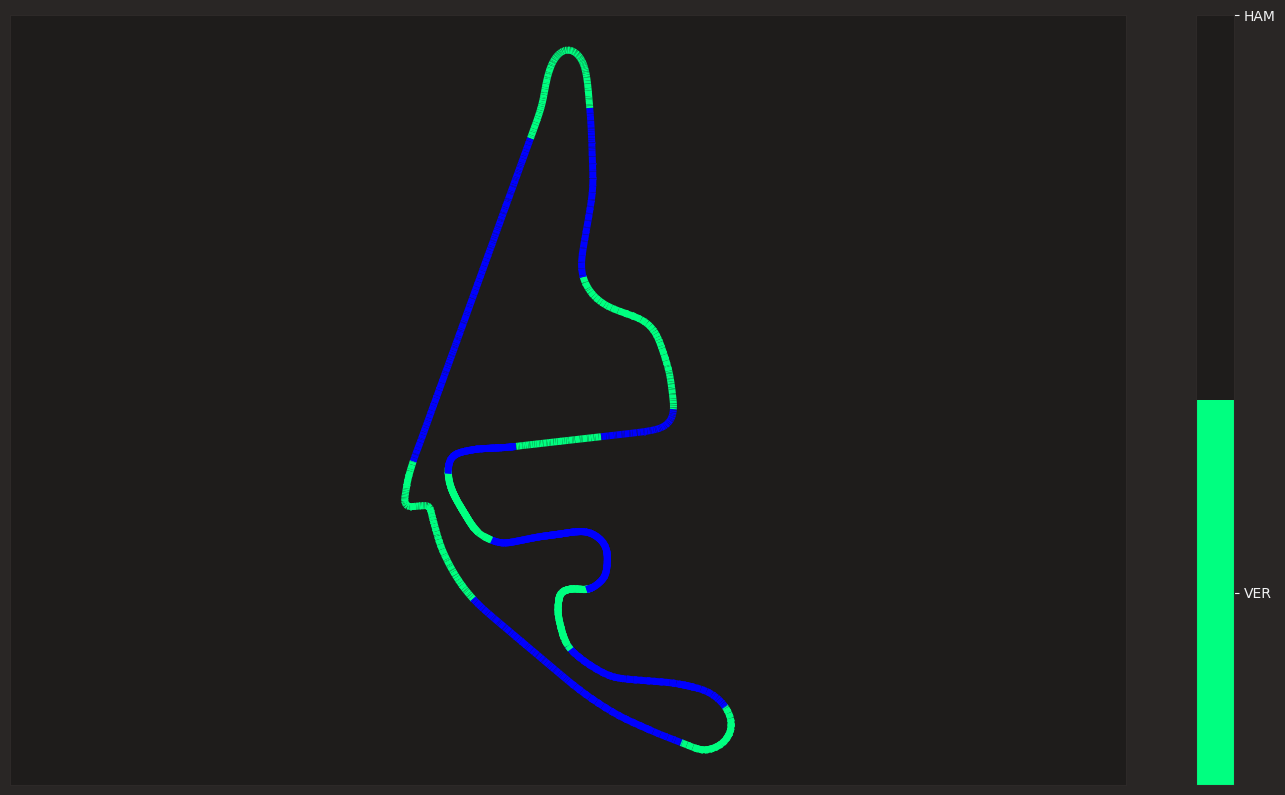

In [23]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

# Prepare segments for line collection
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Prepare color array for the drivers
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

# Create a colormap
cmap = cm.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, 2), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

# Set figure size
plt.rcParams['figure.figsize'] = [18, 10]

# Plot the track
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Add colorbar
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 3))
cbar.set_ticks([1.5, 2.5])  # Two ticks for two drivers
cbar.set_ticklabels(['VER', 'HAM'])  # Two labels

# Save and show the plot
plt.savefig(f"2021_ver_ham_q.png", dpi=300)
plt.show()
